In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [31]:
%%capture
!pip install torchvision

#### Prepare for Dataset

In [32]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


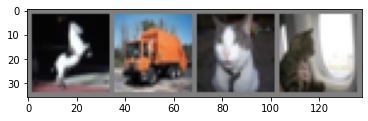

horse truck   cat   cat


In [33]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Choose a Device

In [34]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cuda:0


# Base Model

#### Base Model Network Definition

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

#### Optimizer and Loss Function for Base Model

In [8]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### Training Procedure

In [9]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.302
[epoch: 0, i:   199] avg mini-batch loss: 2.303
[epoch: 0, i:   299] avg mini-batch loss: 2.300
[epoch: 0, i:   399] avg mini-batch loss: 2.300
[epoch: 0, i:   499] avg mini-batch loss: 2.296
[epoch: 0, i:   599] avg mini-batch loss: 2.287
[epoch: 0, i:   699] avg mini-batch loss: 2.284
[epoch: 0, i:   799] avg mini-batch loss: 2.267
[epoch: 0, i:   899] avg mini-batch loss: 2.246
[epoch: 0, i:   999] avg mini-batch loss: 2.235
[epoch: 0, i:  1099] avg mini-batch loss: 2.205
[epoch: 0, i:  1199] avg mini-batch loss: 2.140
[epoch: 0, i:  1299] avg mini-batch loss: 2.192
[epoch: 0, i:  1399] avg mini-batch loss: 2.137
[epoch: 0, i:  1499] avg mini-batch loss: 2.128
[epoch: 0, i:  1599] avg mini-batch loss: 2.124
[epoch: 0, i:  1699] avg mini-batch loss: 2.100
[epoch: 0, i:  1799] avg mini-batch loss: 2.033
[epoch: 0, i:  1899] avg mini-batch loss: 2.037
[epoch: 0, i:  1999] avg mini-batch loss: 1.982
[epoch: 0, i:  2099] avg mini-batch loss

[epoch: 1, i:  4699] avg mini-batch loss: 1.455
[epoch: 1, i:  4799] avg mini-batch loss: 1.329
[epoch: 1, i:  4899] avg mini-batch loss: 1.386
[epoch: 1, i:  4999] avg mini-batch loss: 1.418
[epoch: 1, i:  5099] avg mini-batch loss: 1.461
[epoch: 1, i:  5199] avg mini-batch loss: 1.400
[epoch: 1, i:  5299] avg mini-batch loss: 1.355
[epoch: 1, i:  5399] avg mini-batch loss: 1.336
[epoch: 1, i:  5499] avg mini-batch loss: 1.287
[epoch: 1, i:  5599] avg mini-batch loss: 1.388
[epoch: 1, i:  5699] avg mini-batch loss: 1.441
[epoch: 1, i:  5799] avg mini-batch loss: 1.434
[epoch: 1, i:  5899] avg mini-batch loss: 1.298
[epoch: 1, i:  5999] avg mini-batch loss: 1.235
[epoch: 1, i:  6099] avg mini-batch loss: 1.374
[epoch: 1, i:  6199] avg mini-batch loss: 1.313
[epoch: 1, i:  6299] avg mini-batch loss: 1.302
[epoch: 1, i:  6399] avg mini-batch loss: 1.370
[epoch: 1, i:  6499] avg mini-batch loss: 1.359
[epoch: 1, i:  6599] avg mini-batch loss: 1.364
[epoch: 1, i:  6699] avg mini-batch loss

[epoch: 2, i:  9299] avg mini-batch loss: 1.264
[epoch: 2, i:  9399] avg mini-batch loss: 1.155
[epoch: 2, i:  9499] avg mini-batch loss: 1.253
[epoch: 2, i:  9599] avg mini-batch loss: 1.181
[epoch: 2, i:  9699] avg mini-batch loss: 1.161
[epoch: 2, i:  9799] avg mini-batch loss: 1.174
[epoch: 2, i:  9899] avg mini-batch loss: 1.190
[epoch: 2, i:  9999] avg mini-batch loss: 1.137
[epoch: 2, i: 10099] avg mini-batch loss: 1.065
[epoch: 2, i: 10199] avg mini-batch loss: 1.296
[epoch: 2, i: 10299] avg mini-batch loss: 1.308
[epoch: 2, i: 10399] avg mini-batch loss: 1.180
[epoch: 2, i: 10499] avg mini-batch loss: 1.195
[epoch: 2, i: 10599] avg mini-batch loss: 1.163
[epoch: 2, i: 10699] avg mini-batch loss: 1.193
[epoch: 2, i: 10799] avg mini-batch loss: 1.133
[epoch: 2, i: 10899] avg mini-batch loss: 1.330
[epoch: 2, i: 10999] avg mini-batch loss: 1.199
[epoch: 2, i: 11099] avg mini-batch loss: 1.174
[epoch: 2, i: 11199] avg mini-batch loss: 1.178
[epoch: 2, i: 11299] avg mini-batch loss

[epoch: 4, i:  1399] avg mini-batch loss: 0.973
[epoch: 4, i:  1499] avg mini-batch loss: 0.932
[epoch: 4, i:  1599] avg mini-batch loss: 0.996
[epoch: 4, i:  1699] avg mini-batch loss: 1.021
[epoch: 4, i:  1799] avg mini-batch loss: 0.953
[epoch: 4, i:  1899] avg mini-batch loss: 1.073
[epoch: 4, i:  1999] avg mini-batch loss: 1.009
[epoch: 4, i:  2099] avg mini-batch loss: 1.041
[epoch: 4, i:  2199] avg mini-batch loss: 0.943
[epoch: 4, i:  2299] avg mini-batch loss: 1.059
[epoch: 4, i:  2399] avg mini-batch loss: 1.043
[epoch: 4, i:  2499] avg mini-batch loss: 1.092
[epoch: 4, i:  2599] avg mini-batch loss: 0.969
[epoch: 4, i:  2699] avg mini-batch loss: 1.043
[epoch: 4, i:  2799] avg mini-batch loss: 1.073
[epoch: 4, i:  2899] avg mini-batch loss: 1.176
[epoch: 4, i:  2999] avg mini-batch loss: 1.127
[epoch: 4, i:  3099] avg mini-batch loss: 1.011
[epoch: 4, i:  3199] avg mini-batch loss: 1.052
[epoch: 4, i:  3299] avg mini-batch loss: 1.080
[epoch: 4, i:  3399] avg mini-batch loss

[epoch: 5, i:  5999] avg mini-batch loss: 1.039
[epoch: 5, i:  6099] avg mini-batch loss: 0.984
[epoch: 5, i:  6199] avg mini-batch loss: 0.844
[epoch: 5, i:  6299] avg mini-batch loss: 1.008
[epoch: 5, i:  6399] avg mini-batch loss: 1.051
[epoch: 5, i:  6499] avg mini-batch loss: 1.017
[epoch: 5, i:  6599] avg mini-batch loss: 0.963
[epoch: 5, i:  6699] avg mini-batch loss: 0.957
[epoch: 5, i:  6799] avg mini-batch loss: 1.063
[epoch: 5, i:  6899] avg mini-batch loss: 1.033
[epoch: 5, i:  6999] avg mini-batch loss: 1.034
[epoch: 5, i:  7099] avg mini-batch loss: 0.927
[epoch: 5, i:  7199] avg mini-batch loss: 1.015
[epoch: 5, i:  7299] avg mini-batch loss: 0.907
[epoch: 5, i:  7399] avg mini-batch loss: 0.918
[epoch: 5, i:  7499] avg mini-batch loss: 1.000
[epoch: 5, i:  7599] avg mini-batch loss: 1.032
[epoch: 5, i:  7699] avg mini-batch loss: 0.911
[epoch: 5, i:  7799] avg mini-batch loss: 0.958
[epoch: 5, i:  7899] avg mini-batch loss: 1.094
[epoch: 5, i:  7999] avg mini-batch loss

[epoch: 6, i: 10599] avg mini-batch loss: 1.027
[epoch: 6, i: 10699] avg mini-batch loss: 0.963
[epoch: 6, i: 10799] avg mini-batch loss: 0.905
[epoch: 6, i: 10899] avg mini-batch loss: 0.976
[epoch: 6, i: 10999] avg mini-batch loss: 0.974
[epoch: 6, i: 11099] avg mini-batch loss: 0.913
[epoch: 6, i: 11199] avg mini-batch loss: 0.924
[epoch: 6, i: 11299] avg mini-batch loss: 0.939
[epoch: 6, i: 11399] avg mini-batch loss: 1.019
[epoch: 6, i: 11499] avg mini-batch loss: 0.949
[epoch: 6, i: 11599] avg mini-batch loss: 0.917
[epoch: 6, i: 11699] avg mini-batch loss: 1.001
[epoch: 6, i: 11799] avg mini-batch loss: 1.004
[epoch: 6, i: 11899] avg mini-batch loss: 0.967
[epoch: 6, i: 11999] avg mini-batch loss: 0.954
[epoch: 6, i: 12099] avg mini-batch loss: 0.897
[epoch: 6, i: 12199] avg mini-batch loss: 1.008
[epoch: 6, i: 12299] avg mini-batch loss: 0.916
[epoch: 6, i: 12399] avg mini-batch loss: 0.852
[epoch: 6, i: 12499] avg mini-batch loss: 0.963
[epoch: 7, i:    99] avg mini-batch loss

[epoch: 8, i:  2699] avg mini-batch loss: 0.880
[epoch: 8, i:  2799] avg mini-batch loss: 0.873
[epoch: 8, i:  2899] avg mini-batch loss: 0.704
[epoch: 8, i:  2999] avg mini-batch loss: 0.857
[epoch: 8, i:  3099] avg mini-batch loss: 0.849
[epoch: 8, i:  3199] avg mini-batch loss: 0.851
[epoch: 8, i:  3299] avg mini-batch loss: 0.870
[epoch: 8, i:  3399] avg mini-batch loss: 0.840
[epoch: 8, i:  3499] avg mini-batch loss: 0.913
[epoch: 8, i:  3599] avg mini-batch loss: 0.926
[epoch: 8, i:  3699] avg mini-batch loss: 0.843
[epoch: 8, i:  3799] avg mini-batch loss: 0.910
[epoch: 8, i:  3899] avg mini-batch loss: 0.991
[epoch: 8, i:  3999] avg mini-batch loss: 0.776
[epoch: 8, i:  4099] avg mini-batch loss: 0.876
[epoch: 8, i:  4199] avg mini-batch loss: 0.931
[epoch: 8, i:  4299] avg mini-batch loss: 0.789
[epoch: 8, i:  4399] avg mini-batch loss: 0.773
[epoch: 8, i:  4499] avg mini-batch loss: 0.885
[epoch: 8, i:  4599] avg mini-batch loss: 0.874
[epoch: 8, i:  4699] avg mini-batch loss

[epoch: 9, i:  7299] avg mini-batch loss: 0.817
[epoch: 9, i:  7399] avg mini-batch loss: 0.911
[epoch: 9, i:  7499] avg mini-batch loss: 0.839
[epoch: 9, i:  7599] avg mini-batch loss: 0.786
[epoch: 9, i:  7699] avg mini-batch loss: 0.924
[epoch: 9, i:  7799] avg mini-batch loss: 0.827
[epoch: 9, i:  7899] avg mini-batch loss: 0.805
[epoch: 9, i:  7999] avg mini-batch loss: 0.874
[epoch: 9, i:  8099] avg mini-batch loss: 0.779
[epoch: 9, i:  8199] avg mini-batch loss: 0.894
[epoch: 9, i:  8299] avg mini-batch loss: 0.849
[epoch: 9, i:  8399] avg mini-batch loss: 0.920
[epoch: 9, i:  8499] avg mini-batch loss: 0.859
[epoch: 9, i:  8599] avg mini-batch loss: 0.792
[epoch: 9, i:  8699] avg mini-batch loss: 0.800
[epoch: 9, i:  8799] avg mini-batch loss: 0.905
[epoch: 9, i:  8899] avg mini-batch loss: 0.844
[epoch: 9, i:  8999] avg mini-batch loss: 0.846
[epoch: 9, i:  9099] avg mini-batch loss: 0.869
[epoch: 9, i:  9199] avg mini-batch loss: 0.821
[epoch: 9, i:  9299] avg mini-batch loss

#### Base Model Training Loss Curve

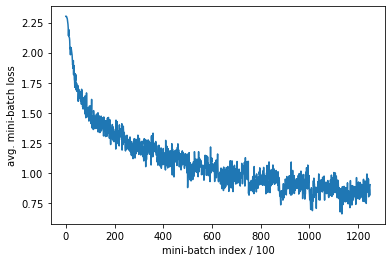

In [10]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate Base Model on Test Dataset

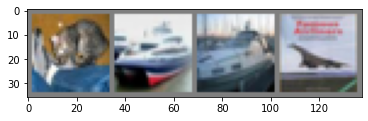

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane


In [11]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [12]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [13]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 57 %
Accuracy of  bird : 54 %
Accuracy of   cat : 60 %
Accuracy of  deer : 49 %
Accuracy of   dog : 38 %
Accuracy of  frog : 70 %
Accuracy of horse : 65 %
Accuracy of  ship : 77 %
Accuracy of truck : 76 %


# Various AlexNet Models

#### AlexNet Network Definition

In [14]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Instantiate the model
AlexNet = AlexNet(num_classes=10)
AlexNet.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
   

#### Optimizer and Loss Function for AlexNet

In [15]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(AlexNet.parameters(), lr=0.001, momentum=0.9)

#### Training Procedure for AlexNet

In [16]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = AlexNet(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.303
[epoch: 0, i:   199] avg mini-batch loss: 2.301
[epoch: 0, i:   299] avg mini-batch loss: 2.302
[epoch: 0, i:   399] avg mini-batch loss: 2.303
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 0, i:   599] avg mini-batch loss: 2.304
[epoch: 0, i:   699] avg mini-batch loss: 2.302
[epoch: 0, i:   799] avg mini-batch loss: 2.306
[epoch: 0, i:   899] avg mini-batch loss: 2.303
[epoch: 0, i:   999] avg mini-batch loss: 2.302
[epoch: 0, i:  1099] avg mini-batch loss: 2.304
[epoch: 0, i:  1199] avg mini-batch loss: 2.302
[epoch: 0, i:  1299] avg mini-batch loss: 2.303
[epoch: 0, i:  1399] avg mini-batch loss: 2.301
[epoch: 0, i:  1499] avg mini-batch loss: 2.306
[epoch: 0, i:  1599] avg mini-batch loss: 2.304
[epoch: 0, i:  1699] avg mini-batch loss: 2.303
[epoch: 0, i:  1799] avg mini-batch loss: 2.304
[epoch: 0, i:  1899] avg mini-batch loss: 2.298
[epoch: 0, i:  1999] avg mini-batch loss: 2.301
[epoch: 0, i:  2099] avg mini-batch loss

[epoch: 1, i:  4699] avg mini-batch loss: 1.438
[epoch: 1, i:  4799] avg mini-batch loss: 1.230
[epoch: 1, i:  4899] avg mini-batch loss: 1.311
[epoch: 1, i:  4999] avg mini-batch loss: 1.309
[epoch: 1, i:  5099] avg mini-batch loss: 1.368
[epoch: 1, i:  5199] avg mini-batch loss: 1.264
[epoch: 1, i:  5299] avg mini-batch loss: 1.265
[epoch: 1, i:  5399] avg mini-batch loss: 1.289
[epoch: 1, i:  5499] avg mini-batch loss: 1.275
[epoch: 1, i:  5599] avg mini-batch loss: 1.318
[epoch: 1, i:  5699] avg mini-batch loss: 1.315
[epoch: 1, i:  5799] avg mini-batch loss: 1.332
[epoch: 1, i:  5899] avg mini-batch loss: 1.304
[epoch: 1, i:  5999] avg mini-batch loss: 1.282
[epoch: 1, i:  6099] avg mini-batch loss: 1.327
[epoch: 1, i:  6199] avg mini-batch loss: 1.253
[epoch: 1, i:  6299] avg mini-batch loss: 1.361
[epoch: 1, i:  6399] avg mini-batch loss: 1.268
[epoch: 1, i:  6499] avg mini-batch loss: 1.270
[epoch: 1, i:  6599] avg mini-batch loss: 1.257
[epoch: 1, i:  6699] avg mini-batch loss

[epoch: 2, i:  9299] avg mini-batch loss: 0.887
[epoch: 2, i:  9399] avg mini-batch loss: 0.881
[epoch: 2, i:  9499] avg mini-batch loss: 0.889
[epoch: 2, i:  9599] avg mini-batch loss: 0.904
[epoch: 2, i:  9699] avg mini-batch loss: 0.955
[epoch: 2, i:  9799] avg mini-batch loss: 0.959
[epoch: 2, i:  9899] avg mini-batch loss: 1.008
[epoch: 2, i:  9999] avg mini-batch loss: 0.861
[epoch: 2, i: 10099] avg mini-batch loss: 0.913
[epoch: 2, i: 10199] avg mini-batch loss: 0.853
[epoch: 2, i: 10299] avg mini-batch loss: 0.905
[epoch: 2, i: 10399] avg mini-batch loss: 0.927
[epoch: 2, i: 10499] avg mini-batch loss: 0.888
[epoch: 2, i: 10599] avg mini-batch loss: 0.863
[epoch: 2, i: 10699] avg mini-batch loss: 0.930
[epoch: 2, i: 10799] avg mini-batch loss: 0.794
[epoch: 2, i: 10899] avg mini-batch loss: 0.941
[epoch: 2, i: 10999] avg mini-batch loss: 0.861
[epoch: 2, i: 11099] avg mini-batch loss: 0.853
[epoch: 2, i: 11199] avg mini-batch loss: 0.961
[epoch: 2, i: 11299] avg mini-batch loss

[epoch: 4, i:  1399] avg mini-batch loss: 0.573
[epoch: 4, i:  1499] avg mini-batch loss: 0.627
[epoch: 4, i:  1599] avg mini-batch loss: 0.523
[epoch: 4, i:  1699] avg mini-batch loss: 0.592
[epoch: 4, i:  1799] avg mini-batch loss: 0.617
[epoch: 4, i:  1899] avg mini-batch loss: 0.650
[epoch: 4, i:  1999] avg mini-batch loss: 0.592
[epoch: 4, i:  2099] avg mini-batch loss: 0.654
[epoch: 4, i:  2199] avg mini-batch loss: 0.630
[epoch: 4, i:  2299] avg mini-batch loss: 0.626
[epoch: 4, i:  2399] avg mini-batch loss: 0.670
[epoch: 4, i:  2499] avg mini-batch loss: 0.624
[epoch: 4, i:  2599] avg mini-batch loss: 0.659
[epoch: 4, i:  2699] avg mini-batch loss: 0.653
[epoch: 4, i:  2799] avg mini-batch loss: 0.713
[epoch: 4, i:  2899] avg mini-batch loss: 0.609
[epoch: 4, i:  2999] avg mini-batch loss: 0.586
[epoch: 4, i:  3099] avg mini-batch loss: 0.782
[epoch: 4, i:  3199] avg mini-batch loss: 0.744
[epoch: 4, i:  3299] avg mini-batch loss: 0.710
[epoch: 4, i:  3399] avg mini-batch loss

[epoch: 5, i:  5999] avg mini-batch loss: 0.495
[epoch: 5, i:  6099] avg mini-batch loss: 0.486
[epoch: 5, i:  6199] avg mini-batch loss: 0.509
[epoch: 5, i:  6299] avg mini-batch loss: 0.495
[epoch: 5, i:  6399] avg mini-batch loss: 0.580
[epoch: 5, i:  6499] avg mini-batch loss: 0.549
[epoch: 5, i:  6599] avg mini-batch loss: 0.470
[epoch: 5, i:  6699] avg mini-batch loss: 0.483
[epoch: 5, i:  6799] avg mini-batch loss: 0.544
[epoch: 5, i:  6899] avg mini-batch loss: 0.610
[epoch: 5, i:  6999] avg mini-batch loss: 0.568
[epoch: 5, i:  7099] avg mini-batch loss: 0.655
[epoch: 5, i:  7199] avg mini-batch loss: 0.486
[epoch: 5, i:  7299] avg mini-batch loss: 0.558
[epoch: 5, i:  7399] avg mini-batch loss: 0.381
[epoch: 5, i:  7499] avg mini-batch loss: 0.542
[epoch: 5, i:  7599] avg mini-batch loss: 0.551
[epoch: 5, i:  7699] avg mini-batch loss: 0.556
[epoch: 5, i:  7799] avg mini-batch loss: 0.559
[epoch: 5, i:  7899] avg mini-batch loss: 0.518
[epoch: 5, i:  7999] avg mini-batch loss

[epoch: 6, i: 10599] avg mini-batch loss: 0.443
[epoch: 6, i: 10699] avg mini-batch loss: 0.440
[epoch: 6, i: 10799] avg mini-batch loss: 0.443
[epoch: 6, i: 10899] avg mini-batch loss: 0.528
[epoch: 6, i: 10999] avg mini-batch loss: 0.463
[epoch: 6, i: 11099] avg mini-batch loss: 0.405
[epoch: 6, i: 11199] avg mini-batch loss: 0.434
[epoch: 6, i: 11299] avg mini-batch loss: 0.524
[epoch: 6, i: 11399] avg mini-batch loss: 0.361
[epoch: 6, i: 11499] avg mini-batch loss: 0.458
[epoch: 6, i: 11599] avg mini-batch loss: 0.374
[epoch: 6, i: 11699] avg mini-batch loss: 0.409
[epoch: 6, i: 11799] avg mini-batch loss: 0.544
[epoch: 6, i: 11899] avg mini-batch loss: 0.501
[epoch: 6, i: 11999] avg mini-batch loss: 0.431
[epoch: 6, i: 12099] avg mini-batch loss: 0.443
[epoch: 6, i: 12199] avg mini-batch loss: 0.435
[epoch: 6, i: 12299] avg mini-batch loss: 0.467
[epoch: 6, i: 12399] avg mini-batch loss: 0.469
[epoch: 6, i: 12499] avg mini-batch loss: 0.437
[epoch: 7, i:    99] avg mini-batch loss

[epoch: 8, i:  2699] avg mini-batch loss: 0.309
[epoch: 8, i:  2799] avg mini-batch loss: 0.218
[epoch: 8, i:  2899] avg mini-batch loss: 0.386
[epoch: 8, i:  2999] avg mini-batch loss: 0.268
[epoch: 8, i:  3099] avg mini-batch loss: 0.313
[epoch: 8, i:  3199] avg mini-batch loss: 0.338
[epoch: 8, i:  3299] avg mini-batch loss: 0.309
[epoch: 8, i:  3399] avg mini-batch loss: 0.261
[epoch: 8, i:  3499] avg mini-batch loss: 0.227
[epoch: 8, i:  3599] avg mini-batch loss: 0.261
[epoch: 8, i:  3699] avg mini-batch loss: 0.262
[epoch: 8, i:  3799] avg mini-batch loss: 0.395
[epoch: 8, i:  3899] avg mini-batch loss: 0.290
[epoch: 8, i:  3999] avg mini-batch loss: 0.368
[epoch: 8, i:  4099] avg mini-batch loss: 0.347
[epoch: 8, i:  4199] avg mini-batch loss: 0.240
[epoch: 8, i:  4299] avg mini-batch loss: 0.254
[epoch: 8, i:  4399] avg mini-batch loss: 0.391
[epoch: 8, i:  4499] avg mini-batch loss: 0.310
[epoch: 8, i:  4599] avg mini-batch loss: 0.293
[epoch: 8, i:  4699] avg mini-batch loss

[epoch: 9, i:  7299] avg mini-batch loss: 0.268
[epoch: 9, i:  7399] avg mini-batch loss: 0.244
[epoch: 9, i:  7499] avg mini-batch loss: 0.278
[epoch: 9, i:  7599] avg mini-batch loss: 0.289
[epoch: 9, i:  7699] avg mini-batch loss: 0.239
[epoch: 9, i:  7799] avg mini-batch loss: 0.311
[epoch: 9, i:  7899] avg mini-batch loss: 0.212
[epoch: 9, i:  7999] avg mini-batch loss: 0.228
[epoch: 9, i:  8099] avg mini-batch loss: 0.318
[epoch: 9, i:  8199] avg mini-batch loss: 0.265
[epoch: 9, i:  8299] avg mini-batch loss: 0.239
[epoch: 9, i:  8399] avg mini-batch loss: 0.281
[epoch: 9, i:  8499] avg mini-batch loss: 0.282
[epoch: 9, i:  8599] avg mini-batch loss: 0.266
[epoch: 9, i:  8699] avg mini-batch loss: 0.314
[epoch: 9, i:  8799] avg mini-batch loss: 0.268
[epoch: 9, i:  8899] avg mini-batch loss: 0.299
[epoch: 9, i:  8999] avg mini-batch loss: 0.352
[epoch: 9, i:  9099] avg mini-batch loss: 0.246
[epoch: 9, i:  9199] avg mini-batch loss: 0.291
[epoch: 9, i:  9299] avg mini-batch loss

#### Training Loss Curve for AlexNet

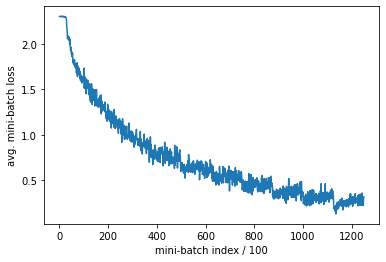

In [17]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate AlexNet on Test Dataset

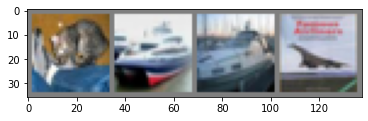

GroundTruth:    cat  ship  ship plane
Predicted:    dog  ship  ship plane


In [18]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = AlexNet(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [19]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = AlexNet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 79 %


In [20]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = AlexNet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 76 %
Accuracy of   car : 90 %
Accuracy of  bird : 64 %
Accuracy of   cat : 64 %
Accuracy of  deer : 74 %
Accuracy of   dog : 80 %
Accuracy of  frog : 86 %
Accuracy of horse : 79 %
Accuracy of  ship : 86 %
Accuracy of truck : 89 %


#### AlexNet Network Definition with Batch Normalization

In [22]:
class AlexNet2(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet2, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Instantiate the model
AlexNet2 = AlexNet2(num_classes=10)
AlexNet2.to(device)

AlexNet2(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): Conv2d(

#### Optimizer and Loss Function for AlexNet2

##### Uses weight decay and schedualr for learning rate

In [23]:
from torch.optim.lr_scheduler import StepLR

# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(AlexNet2.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
# Schedular
scheduler = StepLR(opt, step_size=5, gamma=0.1)

#### Training Procedure for AlexNet2

In [24]:
avg_losses = []   # Avg. losses.
epochs = 15       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = AlexNet2(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
    
    # Update the learning rate after each epoch.
    scheduler.step()

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.391
[epoch: 0, i:   199] avg mini-batch loss: 2.207
[epoch: 0, i:   299] avg mini-batch loss: 2.142
[epoch: 0, i:   399] avg mini-batch loss: 2.053
[epoch: 0, i:   499] avg mini-batch loss: 1.936
[epoch: 0, i:   599] avg mini-batch loss: 1.996
[epoch: 0, i:   699] avg mini-batch loss: 1.902
[epoch: 0, i:   799] avg mini-batch loss: 1.893
[epoch: 0, i:   899] avg mini-batch loss: 1.782
[epoch: 0, i:   999] avg mini-batch loss: 1.888
[epoch: 0, i:  1099] avg mini-batch loss: 1.921
[epoch: 0, i:  1199] avg mini-batch loss: 1.742
[epoch: 0, i:  1299] avg mini-batch loss: 1.841
[epoch: 0, i:  1399] avg mini-batch loss: 1.786
[epoch: 0, i:  1499] avg mini-batch loss: 1.752
[epoch: 0, i:  1599] avg mini-batch loss: 1.776
[epoch: 0, i:  1699] avg mini-batch loss: 1.789
[epoch: 0, i:  1799] avg mini-batch loss: 1.651
[epoch: 0, i:  1899] avg mini-batch loss: 1.729
[epoch: 0, i:  1999] avg mini-batch loss: 1.743
[epoch: 0, i:  2099] avg mini-batch loss

[epoch: 1, i:  4699] avg mini-batch loss: 1.126
[epoch: 1, i:  4799] avg mini-batch loss: 1.040
[epoch: 1, i:  4899] avg mini-batch loss: 1.139
[epoch: 1, i:  4999] avg mini-batch loss: 1.039
[epoch: 1, i:  5099] avg mini-batch loss: 1.089
[epoch: 1, i:  5199] avg mini-batch loss: 0.895
[epoch: 1, i:  5299] avg mini-batch loss: 1.171
[epoch: 1, i:  5399] avg mini-batch loss: 1.163
[epoch: 1, i:  5499] avg mini-batch loss: 1.165
[epoch: 1, i:  5599] avg mini-batch loss: 1.059
[epoch: 1, i:  5699] avg mini-batch loss: 1.011
[epoch: 1, i:  5799] avg mini-batch loss: 0.989
[epoch: 1, i:  5899] avg mini-batch loss: 1.096
[epoch: 1, i:  5999] avg mini-batch loss: 0.976
[epoch: 1, i:  6099] avg mini-batch loss: 1.086
[epoch: 1, i:  6199] avg mini-batch loss: 1.067
[epoch: 1, i:  6299] avg mini-batch loss: 1.017
[epoch: 1, i:  6399] avg mini-batch loss: 1.050
[epoch: 1, i:  6499] avg mini-batch loss: 1.088
[epoch: 1, i:  6599] avg mini-batch loss: 0.895
[epoch: 1, i:  6699] avg mini-batch loss

[epoch: 2, i:  9299] avg mini-batch loss: 0.791
[epoch: 2, i:  9399] avg mini-batch loss: 0.788
[epoch: 2, i:  9499] avg mini-batch loss: 0.815
[epoch: 2, i:  9599] avg mini-batch loss: 0.887
[epoch: 2, i:  9699] avg mini-batch loss: 0.806
[epoch: 2, i:  9799] avg mini-batch loss: 0.868
[epoch: 2, i:  9899] avg mini-batch loss: 0.875
[epoch: 2, i:  9999] avg mini-batch loss: 0.831
[epoch: 2, i: 10099] avg mini-batch loss: 0.814
[epoch: 2, i: 10199] avg mini-batch loss: 0.930
[epoch: 2, i: 10299] avg mini-batch loss: 0.884
[epoch: 2, i: 10399] avg mini-batch loss: 0.846
[epoch: 2, i: 10499] avg mini-batch loss: 0.823
[epoch: 2, i: 10599] avg mini-batch loss: 0.758
[epoch: 2, i: 10699] avg mini-batch loss: 0.906
[epoch: 2, i: 10799] avg mini-batch loss: 0.793
[epoch: 2, i: 10899] avg mini-batch loss: 0.749
[epoch: 2, i: 10999] avg mini-batch loss: 0.963
[epoch: 2, i: 11099] avg mini-batch loss: 0.827
[epoch: 2, i: 11199] avg mini-batch loss: 0.891
[epoch: 2, i: 11299] avg mini-batch loss

[epoch: 4, i:  1399] avg mini-batch loss: 0.664
[epoch: 4, i:  1499] avg mini-batch loss: 0.677
[epoch: 4, i:  1599] avg mini-batch loss: 0.648
[epoch: 4, i:  1699] avg mini-batch loss: 0.660
[epoch: 4, i:  1799] avg mini-batch loss: 0.738
[epoch: 4, i:  1899] avg mini-batch loss: 0.640
[epoch: 4, i:  1999] avg mini-batch loss: 0.574
[epoch: 4, i:  2099] avg mini-batch loss: 0.627
[epoch: 4, i:  2199] avg mini-batch loss: 0.715
[epoch: 4, i:  2299] avg mini-batch loss: 0.596
[epoch: 4, i:  2399] avg mini-batch loss: 0.670
[epoch: 4, i:  2499] avg mini-batch loss: 0.645
[epoch: 4, i:  2599] avg mini-batch loss: 0.537
[epoch: 4, i:  2699] avg mini-batch loss: 0.631
[epoch: 4, i:  2799] avg mini-batch loss: 0.678
[epoch: 4, i:  2899] avg mini-batch loss: 0.620
[epoch: 4, i:  2999] avg mini-batch loss: 0.620
[epoch: 4, i:  3099] avg mini-batch loss: 0.664
[epoch: 4, i:  3199] avg mini-batch loss: 0.706
[epoch: 4, i:  3299] avg mini-batch loss: 0.644
[epoch: 4, i:  3399] avg mini-batch loss

[epoch: 5, i:  5999] avg mini-batch loss: 0.395
[epoch: 5, i:  6099] avg mini-batch loss: 0.357
[epoch: 5, i:  6199] avg mini-batch loss: 0.438
[epoch: 5, i:  6299] avg mini-batch loss: 0.469
[epoch: 5, i:  6399] avg mini-batch loss: 0.411
[epoch: 5, i:  6499] avg mini-batch loss: 0.344
[epoch: 5, i:  6599] avg mini-batch loss: 0.417
[epoch: 5, i:  6699] avg mini-batch loss: 0.434
[epoch: 5, i:  6799] avg mini-batch loss: 0.408
[epoch: 5, i:  6899] avg mini-batch loss: 0.408
[epoch: 5, i:  6999] avg mini-batch loss: 0.428
[epoch: 5, i:  7099] avg mini-batch loss: 0.384
[epoch: 5, i:  7199] avg mini-batch loss: 0.350
[epoch: 5, i:  7299] avg mini-batch loss: 0.406
[epoch: 5, i:  7399] avg mini-batch loss: 0.490
[epoch: 5, i:  7499] avg mini-batch loss: 0.385
[epoch: 5, i:  7599] avg mini-batch loss: 0.380
[epoch: 5, i:  7699] avg mini-batch loss: 0.502
[epoch: 5, i:  7799] avg mini-batch loss: 0.410
[epoch: 5, i:  7899] avg mini-batch loss: 0.373
[epoch: 5, i:  7999] avg mini-batch loss

[epoch: 7, i:  2099] avg mini-batch loss: 0.327
[epoch: 7, i:  2199] avg mini-batch loss: 0.369
[epoch: 7, i:  2299] avg mini-batch loss: 0.402
[epoch: 7, i:  2399] avg mini-batch loss: 0.355
[epoch: 7, i:  2499] avg mini-batch loss: 0.298
[epoch: 7, i:  2599] avg mini-batch loss: 0.364
[epoch: 7, i:  2699] avg mini-batch loss: 0.332
[epoch: 7, i:  2799] avg mini-batch loss: 0.352
[epoch: 7, i:  2899] avg mini-batch loss: 0.340
[epoch: 7, i:  2999] avg mini-batch loss: 0.367
[epoch: 7, i:  3099] avg mini-batch loss: 0.375
[epoch: 7, i:  3199] avg mini-batch loss: 0.356
[epoch: 7, i:  3299] avg mini-batch loss: 0.351
[epoch: 7, i:  3399] avg mini-batch loss: 0.315
[epoch: 7, i:  3499] avg mini-batch loss: 0.320
[epoch: 7, i:  3599] avg mini-batch loss: 0.346
[epoch: 7, i:  3699] avg mini-batch loss: 0.392
[epoch: 7, i:  3799] avg mini-batch loss: 0.338
[epoch: 7, i:  3899] avg mini-batch loss: 0.396
[epoch: 7, i:  3999] avg mini-batch loss: 0.312
[epoch: 7, i:  4099] avg mini-batch loss

[epoch: 8, i:  6699] avg mini-batch loss: 0.376
[epoch: 8, i:  6799] avg mini-batch loss: 0.306
[epoch: 8, i:  6899] avg mini-batch loss: 0.275
[epoch: 8, i:  6999] avg mini-batch loss: 0.367
[epoch: 8, i:  7099] avg mini-batch loss: 0.369
[epoch: 8, i:  7199] avg mini-batch loss: 0.315
[epoch: 8, i:  7299] avg mini-batch loss: 0.301
[epoch: 8, i:  7399] avg mini-batch loss: 0.312
[epoch: 8, i:  7499] avg mini-batch loss: 0.312
[epoch: 8, i:  7599] avg mini-batch loss: 0.300
[epoch: 8, i:  7699] avg mini-batch loss: 0.334
[epoch: 8, i:  7799] avg mini-batch loss: 0.253
[epoch: 8, i:  7899] avg mini-batch loss: 0.283
[epoch: 8, i:  7999] avg mini-batch loss: 0.284
[epoch: 8, i:  8099] avg mini-batch loss: 0.323
[epoch: 8, i:  8199] avg mini-batch loss: 0.273
[epoch: 8, i:  8299] avg mini-batch loss: 0.270
[epoch: 8, i:  8399] avg mini-batch loss: 0.240
[epoch: 8, i:  8499] avg mini-batch loss: 0.346
[epoch: 8, i:  8599] avg mini-batch loss: 0.262
[epoch: 8, i:  8699] avg mini-batch loss

[epoch: 9, i: 11299] avg mini-batch loss: 0.221
[epoch: 9, i: 11399] avg mini-batch loss: 0.262
[epoch: 9, i: 11499] avg mini-batch loss: 0.292
[epoch: 9, i: 11599] avg mini-batch loss: 0.258
[epoch: 9, i: 11699] avg mini-batch loss: 0.318
[epoch: 9, i: 11799] avg mini-batch loss: 0.273
[epoch: 9, i: 11899] avg mini-batch loss: 0.304
[epoch: 9, i: 11999] avg mini-batch loss: 0.258
[epoch: 9, i: 12099] avg mini-batch loss: 0.326
[epoch: 9, i: 12199] avg mini-batch loss: 0.314
[epoch: 9, i: 12299] avg mini-batch loss: 0.277
[epoch: 9, i: 12399] avg mini-batch loss: 0.276
[epoch: 9, i: 12499] avg mini-batch loss: 0.283
[epoch: 10, i:    99] avg mini-batch loss: 0.234
[epoch: 10, i:   199] avg mini-batch loss: 0.286
[epoch: 10, i:   299] avg mini-batch loss: 0.232
[epoch: 10, i:   399] avg mini-batch loss: 0.269
[epoch: 10, i:   499] avg mini-batch loss: 0.261
[epoch: 10, i:   599] avg mini-batch loss: 0.252
[epoch: 10, i:   699] avg mini-batch loss: 0.263
[epoch: 10, i:   799] avg mini-ba

[epoch: 11, i:  3099] avg mini-batch loss: 0.222
[epoch: 11, i:  3199] avg mini-batch loss: 0.259
[epoch: 11, i:  3299] avg mini-batch loss: 0.221
[epoch: 11, i:  3399] avg mini-batch loss: 0.218
[epoch: 11, i:  3499] avg mini-batch loss: 0.246
[epoch: 11, i:  3599] avg mini-batch loss: 0.214
[epoch: 11, i:  3699] avg mini-batch loss: 0.225
[epoch: 11, i:  3799] avg mini-batch loss: 0.246
[epoch: 11, i:  3899] avg mini-batch loss: 0.225
[epoch: 11, i:  3999] avg mini-batch loss: 0.252
[epoch: 11, i:  4099] avg mini-batch loss: 0.250
[epoch: 11, i:  4199] avg mini-batch loss: 0.212
[epoch: 11, i:  4299] avg mini-batch loss: 0.209
[epoch: 11, i:  4399] avg mini-batch loss: 0.265
[epoch: 11, i:  4499] avg mini-batch loss: 0.214
[epoch: 11, i:  4599] avg mini-batch loss: 0.226
[epoch: 11, i:  4699] avg mini-batch loss: 0.260
[epoch: 11, i:  4799] avg mini-batch loss: 0.217
[epoch: 11, i:  4899] avg mini-batch loss: 0.236
[epoch: 11, i:  4999] avg mini-batch loss: 0.244
[epoch: 11, i:  5099

[epoch: 12, i:  7399] avg mini-batch loss: 0.297
[epoch: 12, i:  7499] avg mini-batch loss: 0.240
[epoch: 12, i:  7599] avg mini-batch loss: 0.271
[epoch: 12, i:  7699] avg mini-batch loss: 0.208
[epoch: 12, i:  7799] avg mini-batch loss: 0.196
[epoch: 12, i:  7899] avg mini-batch loss: 0.248
[epoch: 12, i:  7999] avg mini-batch loss: 0.257
[epoch: 12, i:  8099] avg mini-batch loss: 0.184
[epoch: 12, i:  8199] avg mini-batch loss: 0.206
[epoch: 12, i:  8299] avg mini-batch loss: 0.263
[epoch: 12, i:  8399] avg mini-batch loss: 0.241
[epoch: 12, i:  8499] avg mini-batch loss: 0.232
[epoch: 12, i:  8599] avg mini-batch loss: 0.191
[epoch: 12, i:  8699] avg mini-batch loss: 0.256
[epoch: 12, i:  8799] avg mini-batch loss: 0.268
[epoch: 12, i:  8899] avg mini-batch loss: 0.258
[epoch: 12, i:  8999] avg mini-batch loss: 0.283
[epoch: 12, i:  9099] avg mini-batch loss: 0.225
[epoch: 12, i:  9199] avg mini-batch loss: 0.305
[epoch: 12, i:  9299] avg mini-batch loss: 0.197
[epoch: 12, i:  9399

[epoch: 13, i: 11699] avg mini-batch loss: 0.212
[epoch: 13, i: 11799] avg mini-batch loss: 0.274
[epoch: 13, i: 11899] avg mini-batch loss: 0.263
[epoch: 13, i: 11999] avg mini-batch loss: 0.226
[epoch: 13, i: 12099] avg mini-batch loss: 0.209
[epoch: 13, i: 12199] avg mini-batch loss: 0.233
[epoch: 13, i: 12299] avg mini-batch loss: 0.250
[epoch: 13, i: 12399] avg mini-batch loss: 0.203
[epoch: 13, i: 12499] avg mini-batch loss: 0.234
[epoch: 14, i:    99] avg mini-batch loss: 0.221
[epoch: 14, i:   199] avg mini-batch loss: 0.267
[epoch: 14, i:   299] avg mini-batch loss: 0.226
[epoch: 14, i:   399] avg mini-batch loss: 0.258
[epoch: 14, i:   499] avg mini-batch loss: 0.251
[epoch: 14, i:   599] avg mini-batch loss: 0.181
[epoch: 14, i:   699] avg mini-batch loss: 0.182
[epoch: 14, i:   799] avg mini-batch loss: 0.255
[epoch: 14, i:   899] avg mini-batch loss: 0.201
[epoch: 14, i:   999] avg mini-batch loss: 0.238
[epoch: 14, i:  1099] avg mini-batch loss: 0.193
[epoch: 14, i:  1199

#### Training Loss Curve for AlexNet2

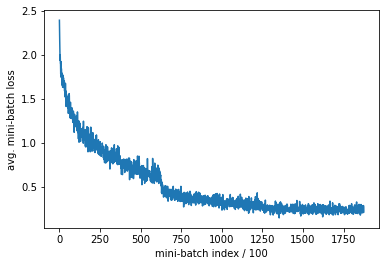

In [25]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate AlexNet2 on Test Dataset

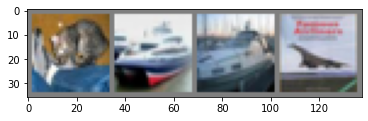

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship


In [26]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = AlexNet2(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [27]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = AlexNet2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 82 %


In [28]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = AlexNet2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 85 %
Accuracy of   car : 91 %
Accuracy of  bird : 74 %
Accuracy of   cat : 65 %
Accuracy of  deer : 83 %
Accuracy of   dog : 74 %
Accuracy of  frog : 88 %
Accuracy of horse : 85 %
Accuracy of  ship : 90 %
Accuracy of truck : 89 %


#### AlexNet Network Definition with Batch Normalization (using Adam Optimizer)

In [29]:
class AlexNet3(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet3, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Instantiate the model
AlexNet3 = AlexNet3(num_classes=10)
AlexNet3.to(device)

AlexNet3(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): Conv2d(

#### Optimizer and Loss Function for AlexNet3

##### Uses Adam optimizer, weight deacy, and schedular

In [31]:
from torch.optim.lr_scheduler import StepLR

# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.Adam(AlexNet3.parameters(), lr=0.001, weight_decay=0.0001)
# Schedular
scheduler = StepLR(opt, step_size=5, gamma=0.1)

#### Training Procedure for AlexNet3

In [33]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = AlexNet3(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
    
    # Update the learning rate after each epoch.
    scheduler.step()

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.319
[epoch: 0, i:   199] avg mini-batch loss: 2.332
[epoch: 0, i:   299] avg mini-batch loss: 2.320
[epoch: 0, i:   399] avg mini-batch loss: 2.317
[epoch: 0, i:   499] avg mini-batch loss: 2.311
[epoch: 0, i:   599] avg mini-batch loss: 2.330
[epoch: 0, i:   699] avg mini-batch loss: 2.326
[epoch: 0, i:   799] avg mini-batch loss: 2.310
[epoch: 0, i:   899] avg mini-batch loss: 2.299
[epoch: 0, i:   999] avg mini-batch loss: 2.310
[epoch: 0, i:  1099] avg mini-batch loss: 2.336
[epoch: 0, i:  1199] avg mini-batch loss: 2.308
[epoch: 0, i:  1299] avg mini-batch loss: 2.331
[epoch: 0, i:  1399] avg mini-batch loss: 2.318
[epoch: 0, i:  1499] avg mini-batch loss: 2.316
[epoch: 0, i:  1599] avg mini-batch loss: 2.309
[epoch: 0, i:  1699] avg mini-batch loss: 2.307
[epoch: 0, i:  1799] avg mini-batch loss: 2.314
[epoch: 0, i:  1899] avg mini-batch loss: 2.351
[epoch: 0, i:  1999] avg mini-batch loss: 2.324
[epoch: 0, i:  2099] avg mini-batch loss

[epoch: 1, i:  4699] avg mini-batch loss: 1.657
[epoch: 1, i:  4799] avg mini-batch loss: 1.597
[epoch: 1, i:  4899] avg mini-batch loss: 1.616
[epoch: 1, i:  4999] avg mini-batch loss: 1.453
[epoch: 1, i:  5099] avg mini-batch loss: 1.593
[epoch: 1, i:  5199] avg mini-batch loss: 1.484
[epoch: 1, i:  5299] avg mini-batch loss: 1.560
[epoch: 1, i:  5399] avg mini-batch loss: 1.587
[epoch: 1, i:  5499] avg mini-batch loss: 1.549
[epoch: 1, i:  5599] avg mini-batch loss: 1.569
[epoch: 1, i:  5699] avg mini-batch loss: 1.513
[epoch: 1, i:  5799] avg mini-batch loss: 1.609
[epoch: 1, i:  5899] avg mini-batch loss: 1.556
[epoch: 1, i:  5999] avg mini-batch loss: 1.595
[epoch: 1, i:  6099] avg mini-batch loss: 1.597
[epoch: 1, i:  6199] avg mini-batch loss: 1.602
[epoch: 1, i:  6299] avg mini-batch loss: 1.573
[epoch: 1, i:  6399] avg mini-batch loss: 1.543
[epoch: 1, i:  6499] avg mini-batch loss: 1.588
[epoch: 1, i:  6599] avg mini-batch loss: 1.592
[epoch: 1, i:  6699] avg mini-batch loss

[epoch: 2, i:  9299] avg mini-batch loss: 1.269
[epoch: 2, i:  9399] avg mini-batch loss: 1.142
[epoch: 2, i:  9499] avg mini-batch loss: 1.298
[epoch: 2, i:  9599] avg mini-batch loss: 1.298
[epoch: 2, i:  9699] avg mini-batch loss: 1.318
[epoch: 2, i:  9799] avg mini-batch loss: 1.204
[epoch: 2, i:  9899] avg mini-batch loss: 1.237
[epoch: 2, i:  9999] avg mini-batch loss: 1.323
[epoch: 2, i: 10099] avg mini-batch loss: 1.261
[epoch: 2, i: 10199] avg mini-batch loss: 1.239
[epoch: 2, i: 10299] avg mini-batch loss: 1.259
[epoch: 2, i: 10399] avg mini-batch loss: 1.199
[epoch: 2, i: 10499] avg mini-batch loss: 1.204
[epoch: 2, i: 10599] avg mini-batch loss: 1.362
[epoch: 2, i: 10699] avg mini-batch loss: 1.215
[epoch: 2, i: 10799] avg mini-batch loss: 1.259
[epoch: 2, i: 10899] avg mini-batch loss: 1.316
[epoch: 2, i: 10999] avg mini-batch loss: 1.240
[epoch: 2, i: 11099] avg mini-batch loss: 1.292
[epoch: 2, i: 11199] avg mini-batch loss: 1.257
[epoch: 2, i: 11299] avg mini-batch loss

[epoch: 4, i:  1399] avg mini-batch loss: 1.225
[epoch: 4, i:  1499] avg mini-batch loss: 1.123
[epoch: 4, i:  1599] avg mini-batch loss: 1.038
[epoch: 4, i:  1699] avg mini-batch loss: 1.044
[epoch: 4, i:  1799] avg mini-batch loss: 1.097
[epoch: 4, i:  1899] avg mini-batch loss: 1.158
[epoch: 4, i:  1999] avg mini-batch loss: 1.076
[epoch: 4, i:  2099] avg mini-batch loss: 1.186
[epoch: 4, i:  2199] avg mini-batch loss: 1.131
[epoch: 4, i:  2299] avg mini-batch loss: 1.108
[epoch: 4, i:  2399] avg mini-batch loss: 1.083
[epoch: 4, i:  2499] avg mini-batch loss: 1.119
[epoch: 4, i:  2599] avg mini-batch loss: 1.080
[epoch: 4, i:  2699] avg mini-batch loss: 1.173
[epoch: 4, i:  2799] avg mini-batch loss: 1.087
[epoch: 4, i:  2899] avg mini-batch loss: 1.007
[epoch: 4, i:  2999] avg mini-batch loss: 1.085
[epoch: 4, i:  3099] avg mini-batch loss: 1.094
[epoch: 4, i:  3199] avg mini-batch loss: 1.137
[epoch: 4, i:  3299] avg mini-batch loss: 1.094
[epoch: 4, i:  3399] avg mini-batch loss

[epoch: 5, i:  5999] avg mini-batch loss: 0.861
[epoch: 5, i:  6099] avg mini-batch loss: 1.014
[epoch: 5, i:  6199] avg mini-batch loss: 0.855
[epoch: 5, i:  6299] avg mini-batch loss: 0.831
[epoch: 5, i:  6399] avg mini-batch loss: 0.848
[epoch: 5, i:  6499] avg mini-batch loss: 0.883
[epoch: 5, i:  6599] avg mini-batch loss: 0.892
[epoch: 5, i:  6699] avg mini-batch loss: 0.813
[epoch: 5, i:  6799] avg mini-batch loss: 0.835
[epoch: 5, i:  6899] avg mini-batch loss: 0.792
[epoch: 5, i:  6999] avg mini-batch loss: 0.837
[epoch: 5, i:  7099] avg mini-batch loss: 0.826
[epoch: 5, i:  7199] avg mini-batch loss: 0.799
[epoch: 5, i:  7299] avg mini-batch loss: 0.922
[epoch: 5, i:  7399] avg mini-batch loss: 0.764
[epoch: 5, i:  7499] avg mini-batch loss: 0.788
[epoch: 5, i:  7599] avg mini-batch loss: 0.875
[epoch: 5, i:  7699] avg mini-batch loss: 0.859
[epoch: 5, i:  7799] avg mini-batch loss: 0.842
[epoch: 5, i:  7899] avg mini-batch loss: 0.820
[epoch: 5, i:  7999] avg mini-batch loss

[epoch: 6, i: 10599] avg mini-batch loss: 0.748
[epoch: 6, i: 10699] avg mini-batch loss: 0.695
[epoch: 6, i: 10799] avg mini-batch loss: 0.802
[epoch: 6, i: 10899] avg mini-batch loss: 0.829
[epoch: 6, i: 10999] avg mini-batch loss: 0.819
[epoch: 6, i: 11099] avg mini-batch loss: 0.892
[epoch: 6, i: 11199] avg mini-batch loss: 0.787
[epoch: 6, i: 11299] avg mini-batch loss: 0.766
[epoch: 6, i: 11399] avg mini-batch loss: 0.718
[epoch: 6, i: 11499] avg mini-batch loss: 0.750
[epoch: 6, i: 11599] avg mini-batch loss: 0.808
[epoch: 6, i: 11699] avg mini-batch loss: 0.836
[epoch: 6, i: 11799] avg mini-batch loss: 0.737
[epoch: 6, i: 11899] avg mini-batch loss: 0.766
[epoch: 6, i: 11999] avg mini-batch loss: 0.699
[epoch: 6, i: 12099] avg mini-batch loss: 0.672
[epoch: 6, i: 12199] avg mini-batch loss: 0.776
[epoch: 6, i: 12299] avg mini-batch loss: 0.789
[epoch: 6, i: 12399] avg mini-batch loss: 0.770
[epoch: 6, i: 12499] avg mini-batch loss: 0.776
[epoch: 7, i:    99] avg mini-batch loss

[epoch: 8, i:  2699] avg mini-batch loss: 0.604
[epoch: 8, i:  2799] avg mini-batch loss: 0.626
[epoch: 8, i:  2899] avg mini-batch loss: 0.753
[epoch: 8, i:  2999] avg mini-batch loss: 0.651
[epoch: 8, i:  3099] avg mini-batch loss: 0.700
[epoch: 8, i:  3199] avg mini-batch loss: 0.765
[epoch: 8, i:  3299] avg mini-batch loss: 0.694
[epoch: 8, i:  3399] avg mini-batch loss: 0.635
[epoch: 8, i:  3499] avg mini-batch loss: 0.730
[epoch: 8, i:  3599] avg mini-batch loss: 0.830
[epoch: 8, i:  3699] avg mini-batch loss: 0.645
[epoch: 8, i:  3799] avg mini-batch loss: 0.685
[epoch: 8, i:  3899] avg mini-batch loss: 0.728
[epoch: 8, i:  3999] avg mini-batch loss: 0.634
[epoch: 8, i:  4099] avg mini-batch loss: 0.700
[epoch: 8, i:  4199] avg mini-batch loss: 0.748
[epoch: 8, i:  4299] avg mini-batch loss: 0.848
[epoch: 8, i:  4399] avg mini-batch loss: 0.767
[epoch: 8, i:  4499] avg mini-batch loss: 0.829
[epoch: 8, i:  4599] avg mini-batch loss: 0.729
[epoch: 8, i:  4699] avg mini-batch loss

[epoch: 9, i:  7299] avg mini-batch loss: 0.732
[epoch: 9, i:  7399] avg mini-batch loss: 0.843
[epoch: 9, i:  7499] avg mini-batch loss: 0.595
[epoch: 9, i:  7599] avg mini-batch loss: 0.580
[epoch: 9, i:  7699] avg mini-batch loss: 0.708
[epoch: 9, i:  7799] avg mini-batch loss: 0.582
[epoch: 9, i:  7899] avg mini-batch loss: 0.573
[epoch: 9, i:  7999] avg mini-batch loss: 0.595
[epoch: 9, i:  8099] avg mini-batch loss: 0.685
[epoch: 9, i:  8199] avg mini-batch loss: 0.684
[epoch: 9, i:  8299] avg mini-batch loss: 0.613
[epoch: 9, i:  8399] avg mini-batch loss: 0.685
[epoch: 9, i:  8499] avg mini-batch loss: 0.598
[epoch: 9, i:  8599] avg mini-batch loss: 0.674
[epoch: 9, i:  8699] avg mini-batch loss: 0.635
[epoch: 9, i:  8799] avg mini-batch loss: 0.685
[epoch: 9, i:  8899] avg mini-batch loss: 0.694
[epoch: 9, i:  8999] avg mini-batch loss: 0.653
[epoch: 9, i:  9099] avg mini-batch loss: 0.718
[epoch: 9, i:  9199] avg mini-batch loss: 0.658
[epoch: 9, i:  9299] avg mini-batch loss

#### Training Loss Curve for AlexNet3

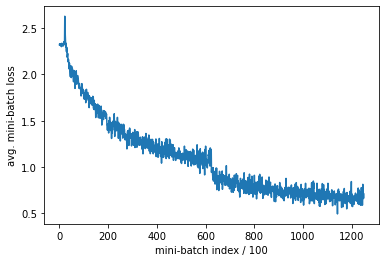

In [34]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate AlexNet3 on Test Dataset

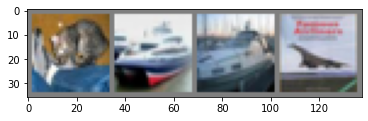

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane  ship


In [35]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = AlexNet3(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [36]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = AlexNet3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 73 %


In [37]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = AlexNet3(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 82 %
Accuracy of   car : 83 %
Accuracy of  bird : 61 %
Accuracy of   cat : 51 %
Accuracy of  deer : 67 %
Accuracy of   dog : 62 %
Accuracy of  frog : 80 %
Accuracy of horse : 79 %
Accuracy of  ship : 80 %
Accuracy of truck : 86 %


#### Prepare Dataset using Data Augmentation

In [40]:
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


#### AlexNet Network Definition with Batch Normalization

##### Same as AlexNet2 but now trained using data augmentation

In [41]:
class AlexNet4(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet4, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Instantiate the model
AlexNet4 = AlexNet4(num_classes=10)
AlexNet4.to(device)

AlexNet4(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): Conv2d(

#### Optimizer and Loss Function for AlexNet4

In [42]:
from torch.optim.lr_scheduler import StepLR

# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(AlexNet4.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
# Schedular
scheduler = StepLR(opt, step_size=5, gamma=0.1)

#### Training Procedure for AlexNet4

In [43]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = AlexNet4(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
    
    # Update the learning rate after each epoch.
    scheduler.step()

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.391
[epoch: 0, i:   199] avg mini-batch loss: 2.288
[epoch: 0, i:   299] avg mini-batch loss: 2.138
[epoch: 0, i:   399] avg mini-batch loss: 2.133
[epoch: 0, i:   499] avg mini-batch loss: 2.014
[epoch: 0, i:   599] avg mini-batch loss: 2.158
[epoch: 0, i:   699] avg mini-batch loss: 2.024
[epoch: 0, i:   799] avg mini-batch loss: 1.977
[epoch: 0, i:   899] avg mini-batch loss: 2.031
[epoch: 0, i:   999] avg mini-batch loss: 1.907
[epoch: 0, i:  1099] avg mini-batch loss: 1.944
[epoch: 0, i:  1199] avg mini-batch loss: 1.968
[epoch: 0, i:  1299] avg mini-batch loss: 1.975
[epoch: 0, i:  1399] avg mini-batch loss: 1.929
[epoch: 0, i:  1499] avg mini-batch loss: 1.960
[epoch: 0, i:  1599] avg mini-batch loss: 1.879
[epoch: 0, i:  1699] avg mini-batch loss: 1.879
[epoch: 0, i:  1799] avg mini-batch loss: 1.826
[epoch: 0, i:  1899] avg mini-batch loss: 1.833
[epoch: 0, i:  1999] avg mini-batch loss: 1.812
[epoch: 0, i:  2099] avg mini-batch loss

[epoch: 1, i:  4699] avg mini-batch loss: 1.195
[epoch: 1, i:  4799] avg mini-batch loss: 1.263
[epoch: 1, i:  4899] avg mini-batch loss: 1.215
[epoch: 1, i:  4999] avg mini-batch loss: 1.229
[epoch: 1, i:  5099] avg mini-batch loss: 1.143
[epoch: 1, i:  5199] avg mini-batch loss: 1.198
[epoch: 1, i:  5299] avg mini-batch loss: 1.202
[epoch: 1, i:  5399] avg mini-batch loss: 1.330
[epoch: 1, i:  5499] avg mini-batch loss: 1.256
[epoch: 1, i:  5599] avg mini-batch loss: 1.280
[epoch: 1, i:  5699] avg mini-batch loss: 1.223
[epoch: 1, i:  5799] avg mini-batch loss: 1.162
[epoch: 1, i:  5899] avg mini-batch loss: 1.266
[epoch: 1, i:  5999] avg mini-batch loss: 1.230
[epoch: 1, i:  6099] avg mini-batch loss: 1.178
[epoch: 1, i:  6199] avg mini-batch loss: 1.217
[epoch: 1, i:  6299] avg mini-batch loss: 1.242
[epoch: 1, i:  6399] avg mini-batch loss: 1.228
[epoch: 1, i:  6499] avg mini-batch loss: 1.187
[epoch: 1, i:  6599] avg mini-batch loss: 1.206
[epoch: 1, i:  6699] avg mini-batch loss

[epoch: 2, i:  9299] avg mini-batch loss: 1.067
[epoch: 2, i:  9399] avg mini-batch loss: 0.949
[epoch: 2, i:  9499] avg mini-batch loss: 1.050
[epoch: 2, i:  9599] avg mini-batch loss: 0.960
[epoch: 2, i:  9699] avg mini-batch loss: 0.940
[epoch: 2, i:  9799] avg mini-batch loss: 0.950
[epoch: 2, i:  9899] avg mini-batch loss: 0.941
[epoch: 2, i:  9999] avg mini-batch loss: 1.033
[epoch: 2, i: 10099] avg mini-batch loss: 0.900
[epoch: 2, i: 10199] avg mini-batch loss: 0.998
[epoch: 2, i: 10299] avg mini-batch loss: 0.997
[epoch: 2, i: 10399] avg mini-batch loss: 1.078
[epoch: 2, i: 10499] avg mini-batch loss: 0.977
[epoch: 2, i: 10599] avg mini-batch loss: 0.998
[epoch: 2, i: 10699] avg mini-batch loss: 1.008
[epoch: 2, i: 10799] avg mini-batch loss: 0.964
[epoch: 2, i: 10899] avg mini-batch loss: 1.006
[epoch: 2, i: 10999] avg mini-batch loss: 0.996
[epoch: 2, i: 11099] avg mini-batch loss: 0.917
[epoch: 2, i: 11199] avg mini-batch loss: 1.021
[epoch: 2, i: 11299] avg mini-batch loss

[epoch: 4, i:  1399] avg mini-batch loss: 0.820
[epoch: 4, i:  1499] avg mini-batch loss: 0.837
[epoch: 4, i:  1599] avg mini-batch loss: 0.833
[epoch: 4, i:  1699] avg mini-batch loss: 0.882
[epoch: 4, i:  1799] avg mini-batch loss: 0.874
[epoch: 4, i:  1899] avg mini-batch loss: 0.840
[epoch: 4, i:  1999] avg mini-batch loss: 0.821
[epoch: 4, i:  2099] avg mini-batch loss: 0.785
[epoch: 4, i:  2199] avg mini-batch loss: 0.845
[epoch: 4, i:  2299] avg mini-batch loss: 0.842
[epoch: 4, i:  2399] avg mini-batch loss: 0.934
[epoch: 4, i:  2499] avg mini-batch loss: 0.710
[epoch: 4, i:  2599] avg mini-batch loss: 0.937
[epoch: 4, i:  2699] avg mini-batch loss: 0.818
[epoch: 4, i:  2799] avg mini-batch loss: 0.778
[epoch: 4, i:  2899] avg mini-batch loss: 0.845
[epoch: 4, i:  2999] avg mini-batch loss: 0.871
[epoch: 4, i:  3099] avg mini-batch loss: 0.861
[epoch: 4, i:  3199] avg mini-batch loss: 0.847
[epoch: 4, i:  3299] avg mini-batch loss: 0.756
[epoch: 4, i:  3399] avg mini-batch loss

[epoch: 5, i:  5999] avg mini-batch loss: 0.710
[epoch: 5, i:  6099] avg mini-batch loss: 0.583
[epoch: 5, i:  6199] avg mini-batch loss: 0.642
[epoch: 5, i:  6299] avg mini-batch loss: 0.577
[epoch: 5, i:  6399] avg mini-batch loss: 0.615
[epoch: 5, i:  6499] avg mini-batch loss: 0.663
[epoch: 5, i:  6599] avg mini-batch loss: 0.650
[epoch: 5, i:  6699] avg mini-batch loss: 0.591
[epoch: 5, i:  6799] avg mini-batch loss: 0.632
[epoch: 5, i:  6899] avg mini-batch loss: 0.634
[epoch: 5, i:  6999] avg mini-batch loss: 0.754
[epoch: 5, i:  7099] avg mini-batch loss: 0.560
[epoch: 5, i:  7199] avg mini-batch loss: 0.650
[epoch: 5, i:  7299] avg mini-batch loss: 0.660
[epoch: 5, i:  7399] avg mini-batch loss: 0.611
[epoch: 5, i:  7499] avg mini-batch loss: 0.675
[epoch: 5, i:  7599] avg mini-batch loss: 0.610
[epoch: 5, i:  7699] avg mini-batch loss: 0.611
[epoch: 5, i:  7799] avg mini-batch loss: 0.652
[epoch: 5, i:  7899] avg mini-batch loss: 0.572
[epoch: 5, i:  7999] avg mini-batch loss

[epoch: 6, i: 10599] avg mini-batch loss: 0.657
[epoch: 6, i: 10699] avg mini-batch loss: 0.577
[epoch: 6, i: 10799] avg mini-batch loss: 0.527
[epoch: 6, i: 10899] avg mini-batch loss: 0.625
[epoch: 6, i: 10999] avg mini-batch loss: 0.518
[epoch: 6, i: 11099] avg mini-batch loss: 0.625
[epoch: 6, i: 11199] avg mini-batch loss: 0.481
[epoch: 6, i: 11299] avg mini-batch loss: 0.507
[epoch: 6, i: 11399] avg mini-batch loss: 0.541
[epoch: 6, i: 11499] avg mini-batch loss: 0.537
[epoch: 6, i: 11599] avg mini-batch loss: 0.548
[epoch: 6, i: 11699] avg mini-batch loss: 0.573
[epoch: 6, i: 11799] avg mini-batch loss: 0.687
[epoch: 6, i: 11899] avg mini-batch loss: 0.591
[epoch: 6, i: 11999] avg mini-batch loss: 0.528
[epoch: 6, i: 12099] avg mini-batch loss: 0.595
[epoch: 6, i: 12199] avg mini-batch loss: 0.566
[epoch: 6, i: 12299] avg mini-batch loss: 0.553
[epoch: 6, i: 12399] avg mini-batch loss: 0.648
[epoch: 6, i: 12499] avg mini-batch loss: 0.617
[epoch: 7, i:    99] avg mini-batch loss

[epoch: 8, i:  2699] avg mini-batch loss: 0.556
[epoch: 8, i:  2799] avg mini-batch loss: 0.505
[epoch: 8, i:  2899] avg mini-batch loss: 0.527
[epoch: 8, i:  2999] avg mini-batch loss: 0.510
[epoch: 8, i:  3099] avg mini-batch loss: 0.499
[epoch: 8, i:  3199] avg mini-batch loss: 0.532
[epoch: 8, i:  3299] avg mini-batch loss: 0.566
[epoch: 8, i:  3399] avg mini-batch loss: 0.547
[epoch: 8, i:  3499] avg mini-batch loss: 0.582
[epoch: 8, i:  3599] avg mini-batch loss: 0.589
[epoch: 8, i:  3699] avg mini-batch loss: 0.620
[epoch: 8, i:  3799] avg mini-batch loss: 0.519
[epoch: 8, i:  3899] avg mini-batch loss: 0.604
[epoch: 8, i:  3999] avg mini-batch loss: 0.528
[epoch: 8, i:  4099] avg mini-batch loss: 0.616
[epoch: 8, i:  4199] avg mini-batch loss: 0.558
[epoch: 8, i:  4299] avg mini-batch loss: 0.510
[epoch: 8, i:  4399] avg mini-batch loss: 0.539
[epoch: 8, i:  4499] avg mini-batch loss: 0.533
[epoch: 8, i:  4599] avg mini-batch loss: 0.630
[epoch: 8, i:  4699] avg mini-batch loss

[epoch: 9, i:  7299] avg mini-batch loss: 0.467
[epoch: 9, i:  7399] avg mini-batch loss: 0.523
[epoch: 9, i:  7499] avg mini-batch loss: 0.530
[epoch: 9, i:  7599] avg mini-batch loss: 0.545
[epoch: 9, i:  7699] avg mini-batch loss: 0.524
[epoch: 9, i:  7799] avg mini-batch loss: 0.556
[epoch: 9, i:  7899] avg mini-batch loss: 0.571
[epoch: 9, i:  7999] avg mini-batch loss: 0.497
[epoch: 9, i:  8099] avg mini-batch loss: 0.500
[epoch: 9, i:  8199] avg mini-batch loss: 0.544
[epoch: 9, i:  8299] avg mini-batch loss: 0.605
[epoch: 9, i:  8399] avg mini-batch loss: 0.570
[epoch: 9, i:  8499] avg mini-batch loss: 0.521
[epoch: 9, i:  8599] avg mini-batch loss: 0.558
[epoch: 9, i:  8699] avg mini-batch loss: 0.475
[epoch: 9, i:  8799] avg mini-batch loss: 0.499
[epoch: 9, i:  8899] avg mini-batch loss: 0.492
[epoch: 9, i:  8999] avg mini-batch loss: 0.556
[epoch: 9, i:  9099] avg mini-batch loss: 0.506
[epoch: 9, i:  9199] avg mini-batch loss: 0.613
[epoch: 9, i:  9299] avg mini-batch loss

#### Training Loss Curve for AlexNet4

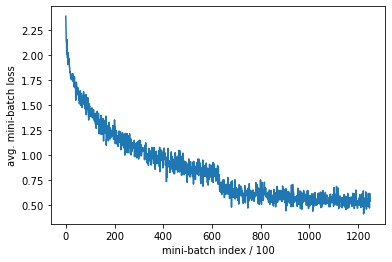

In [44]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate AlexNet4 on Test Dataset

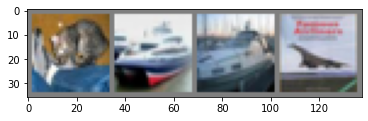

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship   car plane


In [45]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = AlexNet4(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [46]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = AlexNet4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 78 %


In [47]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = AlexNet4(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 81 %
Accuracy of   car : 91 %
Accuracy of  bird : 64 %
Accuracy of   cat : 58 %
Accuracy of  deer : 74 %
Accuracy of   dog : 70 %
Accuracy of  frog : 80 %
Accuracy of horse : 86 %
Accuracy of  ship : 84 %
Accuracy of truck : 93 %


# VGG-16 Model

#### VGG-16 Network Definition

In [11]:
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
    
# Instantiate the model
VGG16 = VGG16(num_classes=10)
VGG16.to(device)

VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

#### Optimizer and Loss Function for VGG16

In [12]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(VGG16.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)


#### Training Procedure for VGG16

In [13]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = VGG16(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.303
[epoch: 0, i:   199] avg mini-batch loss: 2.302
[epoch: 0, i:   299] avg mini-batch loss: 2.303
[epoch: 0, i:   399] avg mini-batch loss: 2.304
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   599] avg mini-batch loss: 2.305
[epoch: 0, i:   699] avg mini-batch loss: 2.302
[epoch: 0, i:   799] avg mini-batch loss: 2.302
[epoch: 0, i:   899] avg mini-batch loss: 2.304
[epoch: 0, i:   999] avg mini-batch loss: 2.304
[epoch: 0, i:  1099] avg mini-batch loss: 2.307
[epoch: 0, i:  1199] avg mini-batch loss: 2.304
[epoch: 0, i:  1299] avg mini-batch loss: 2.304
[epoch: 0, i:  1399] avg mini-batch loss: 2.301
[epoch: 0, i:  1499] avg mini-batch loss: 2.306
[epoch: 0, i:  1599] avg mini-batch loss: 2.302
[epoch: 0, i:  1699] avg mini-batch loss: 2.303
[epoch: 0, i:  1799] avg mini-batch loss: 2.304
[epoch: 0, i:  1899] avg mini-batch loss: 2.305
[epoch: 0, i:  1999] avg mini-batch loss: 2.300
[epoch: 0, i:  2099] avg mini-batch loss

[epoch: 1, i:  4699] avg mini-batch loss: 2.304
[epoch: 1, i:  4799] avg mini-batch loss: 2.303
[epoch: 1, i:  4899] avg mini-batch loss: 2.299
[epoch: 1, i:  4999] avg mini-batch loss: 2.305
[epoch: 1, i:  5099] avg mini-batch loss: 2.303
[epoch: 1, i:  5199] avg mini-batch loss: 2.303
[epoch: 1, i:  5299] avg mini-batch loss: 2.305
[epoch: 1, i:  5399] avg mini-batch loss: 2.305
[epoch: 1, i:  5499] avg mini-batch loss: 2.304
[epoch: 1, i:  5599] avg mini-batch loss: 2.299
[epoch: 1, i:  5699] avg mini-batch loss: 2.306
[epoch: 1, i:  5799] avg mini-batch loss: 2.303
[epoch: 1, i:  5899] avg mini-batch loss: 2.303
[epoch: 1, i:  5999] avg mini-batch loss: 2.305
[epoch: 1, i:  6099] avg mini-batch loss: 2.304
[epoch: 1, i:  6199] avg mini-batch loss: 2.306
[epoch: 1, i:  6299] avg mini-batch loss: 2.304
[epoch: 1, i:  6399] avg mini-batch loss: 2.304
[epoch: 1, i:  6499] avg mini-batch loss: 2.304
[epoch: 1, i:  6599] avg mini-batch loss: 2.304
[epoch: 1, i:  6699] avg mini-batch loss

[epoch: 2, i: 11699] avg mini-batch loss: 2.307
[epoch: 2, i: 11799] avg mini-batch loss: 2.302
[epoch: 2, i: 11899] avg mini-batch loss: 2.305
[epoch: 2, i: 11999] avg mini-batch loss: 2.304
[epoch: 2, i: 12099] avg mini-batch loss: 2.303
[epoch: 2, i: 12199] avg mini-batch loss: 2.304
[epoch: 2, i: 12299] avg mini-batch loss: 2.302
[epoch: 2, i: 12399] avg mini-batch loss: 2.304
[epoch: 2, i: 12499] avg mini-batch loss: 2.301
[epoch: 3, i:    99] avg mini-batch loss: 2.304
[epoch: 3, i:   199] avg mini-batch loss: 2.304
[epoch: 3, i:   299] avg mini-batch loss: 2.303
[epoch: 3, i:   399] avg mini-batch loss: 2.303
[epoch: 3, i:   499] avg mini-batch loss: 2.301
[epoch: 3, i:   599] avg mini-batch loss: 2.305
[epoch: 3, i:   699] avg mini-batch loss: 2.303
[epoch: 3, i:   799] avg mini-batch loss: 2.303
[epoch: 3, i:   899] avg mini-batch loss: 2.304
[epoch: 3, i:   999] avg mini-batch loss: 2.305
[epoch: 3, i:  1099] avg mini-batch loss: 2.303
[epoch: 3, i:  1199] avg mini-batch loss

[epoch: 4, i:  3799] avg mini-batch loss: 2.305
[epoch: 4, i:  3899] avg mini-batch loss: 2.302
[epoch: 4, i:  3999] avg mini-batch loss: 2.305
[epoch: 4, i:  4099] avg mini-batch loss: 2.302
[epoch: 4, i:  4199] avg mini-batch loss: 2.304
[epoch: 4, i:  4299] avg mini-batch loss: 2.300
[epoch: 4, i:  4399] avg mini-batch loss: 2.299
[epoch: 4, i:  4499] avg mini-batch loss: 2.304
[epoch: 4, i:  4599] avg mini-batch loss: 2.305
[epoch: 4, i:  4699] avg mini-batch loss: 2.300
[epoch: 4, i:  4799] avg mini-batch loss: 2.304
[epoch: 4, i:  4899] avg mini-batch loss: 2.304
[epoch: 4, i:  4999] avg mini-batch loss: 2.303
[epoch: 4, i:  5099] avg mini-batch loss: 2.305
[epoch: 4, i:  5199] avg mini-batch loss: 2.305
[epoch: 4, i:  5299] avg mini-batch loss: 2.303
[epoch: 4, i:  5399] avg mini-batch loss: 2.301
[epoch: 4, i:  5499] avg mini-batch loss: 2.305
[epoch: 4, i:  5599] avg mini-batch loss: 2.305
[epoch: 4, i:  5699] avg mini-batch loss: 2.303
[epoch: 4, i:  5799] avg mini-batch loss

[epoch: 5, i:  8399] avg mini-batch loss: 2.303
[epoch: 5, i:  8499] avg mini-batch loss: 2.301
[epoch: 5, i:  8599] avg mini-batch loss: 2.305
[epoch: 5, i:  8699] avg mini-batch loss: 2.302
[epoch: 5, i:  8799] avg mini-batch loss: 2.304
[epoch: 5, i:  8899] avg mini-batch loss: 2.305
[epoch: 5, i:  8999] avg mini-batch loss: 2.304
[epoch: 5, i:  9099] avg mini-batch loss: 2.302
[epoch: 5, i:  9199] avg mini-batch loss: 2.305
[epoch: 5, i:  9299] avg mini-batch loss: 2.300
[epoch: 5, i:  9399] avg mini-batch loss: 2.302
[epoch: 5, i:  9499] avg mini-batch loss: 2.307
[epoch: 5, i:  9599] avg mini-batch loss: 2.303
[epoch: 5, i:  9699] avg mini-batch loss: 2.307
[epoch: 5, i:  9799] avg mini-batch loss: 2.303
[epoch: 5, i:  9899] avg mini-batch loss: 2.302
[epoch: 5, i:  9999] avg mini-batch loss: 2.303
[epoch: 5, i: 10099] avg mini-batch loss: 2.302
[epoch: 5, i: 10199] avg mini-batch loss: 2.306
[epoch: 5, i: 10299] avg mini-batch loss: 2.302
[epoch: 5, i: 10399] avg mini-batch loss

[epoch: 7, i:   499] avg mini-batch loss: 2.306
[epoch: 7, i:   599] avg mini-batch loss: 2.306
[epoch: 7, i:   699] avg mini-batch loss: 2.303
[epoch: 7, i:   799] avg mini-batch loss: 2.305
[epoch: 7, i:   899] avg mini-batch loss: 2.304
[epoch: 7, i:   999] avg mini-batch loss: 2.303
[epoch: 7, i:  1099] avg mini-batch loss: 2.301
[epoch: 7, i:  1199] avg mini-batch loss: 2.305
[epoch: 7, i:  1299] avg mini-batch loss: 2.305
[epoch: 7, i:  1399] avg mini-batch loss: 2.303
[epoch: 7, i:  1499] avg mini-batch loss: 2.305
[epoch: 7, i:  1599] avg mini-batch loss: 2.303
[epoch: 7, i:  1699] avg mini-batch loss: 2.303
[epoch: 7, i:  1799] avg mini-batch loss: 2.303
[epoch: 7, i:  1899] avg mini-batch loss: 2.304
[epoch: 7, i:  1999] avg mini-batch loss: 2.304
[epoch: 7, i:  2099] avg mini-batch loss: 2.304
[epoch: 7, i:  2199] avg mini-batch loss: 2.304
[epoch: 7, i:  2299] avg mini-batch loss: 2.304
[epoch: 7, i:  2399] avg mini-batch loss: 2.304
[epoch: 7, i:  2499] avg mini-batch loss

[epoch: 8, i:  5099] avg mini-batch loss: 2.302
[epoch: 8, i:  5199] avg mini-batch loss: 2.304
[epoch: 8, i:  5299] avg mini-batch loss: 2.302
[epoch: 8, i:  5399] avg mini-batch loss: 2.302
[epoch: 8, i:  5499] avg mini-batch loss: 2.302
[epoch: 8, i:  5599] avg mini-batch loss: 2.306
[epoch: 8, i:  5699] avg mini-batch loss: 2.306
[epoch: 8, i:  5799] avg mini-batch loss: 2.303
[epoch: 8, i:  5899] avg mini-batch loss: 2.301
[epoch: 8, i:  5999] avg mini-batch loss: 2.303
[epoch: 8, i:  6099] avg mini-batch loss: 2.306
[epoch: 8, i:  6199] avg mini-batch loss: 2.303
[epoch: 8, i:  6299] avg mini-batch loss: 2.303
[epoch: 8, i:  6399] avg mini-batch loss: 2.304
[epoch: 8, i:  6499] avg mini-batch loss: 2.304
[epoch: 8, i:  6599] avg mini-batch loss: 2.304
[epoch: 8, i:  6699] avg mini-batch loss: 2.302
[epoch: 8, i:  6799] avg mini-batch loss: 2.305
[epoch: 8, i:  6899] avg mini-batch loss: 2.302
[epoch: 8, i:  6999] avg mini-batch loss: 2.303
[epoch: 8, i:  7099] avg mini-batch loss

[epoch: 9, i:  9699] avg mini-batch loss: 2.306
[epoch: 9, i:  9799] avg mini-batch loss: 2.300
[epoch: 9, i:  9899] avg mini-batch loss: 2.305
[epoch: 9, i:  9999] avg mini-batch loss: 2.307
[epoch: 9, i: 10099] avg mini-batch loss: 2.304
[epoch: 9, i: 10199] avg mini-batch loss: 2.302
[epoch: 9, i: 10299] avg mini-batch loss: 2.304
[epoch: 9, i: 10399] avg mini-batch loss: 2.302
[epoch: 9, i: 10499] avg mini-batch loss: 2.303
[epoch: 9, i: 10599] avg mini-batch loss: 2.302
[epoch: 9, i: 10699] avg mini-batch loss: 2.306
[epoch: 9, i: 10799] avg mini-batch loss: 2.303
[epoch: 9, i: 10899] avg mini-batch loss: 2.302
[epoch: 9, i: 10999] avg mini-batch loss: 2.303
[epoch: 9, i: 11099] avg mini-batch loss: 2.305
[epoch: 9, i: 11199] avg mini-batch loss: 2.301
[epoch: 9, i: 11299] avg mini-batch loss: 2.305
[epoch: 9, i: 11399] avg mini-batch loss: 2.304
[epoch: 9, i: 11499] avg mini-batch loss: 2.303
[epoch: 9, i: 11599] avg mini-batch loss: 2.303
[epoch: 9, i: 11699] avg mini-batch loss

#### Training Loss Curve for VGG16

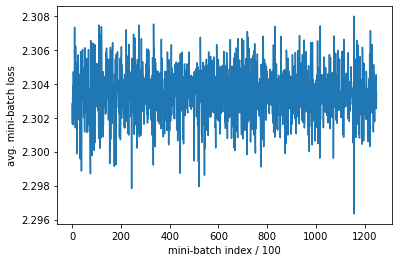

In [14]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate VGG16 on Test Dataset

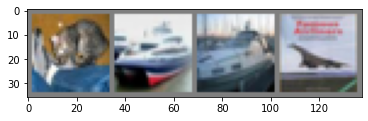

GroundTruth:    cat  ship  ship plane
Predicted:  truck truck truck truck


In [15]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = VGG16(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [16]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = VGG16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


In [17]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = VGG16(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck : 100 %


#### Prepare the Dataset Using Data Augmentation

In [35]:
# Define the data transformations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


#### VGG-16 Network Definition with Batch Normalization

In [37]:
class VGG16_2(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16_2, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
    
# Instantiate the model
VGG16_2 = VGG16_2(num_classes=10)
VGG16_2.to(device)

VGG16_2(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128,

#### Optimizer and Loss Function for VGG16_2

In [41]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(VGG16_2.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

#### Training Procedure for VGG16_2

In [42]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = VGG16_2(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0
            
#     scheduler.step()

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 5.818
[epoch: 0, i:   199] avg mini-batch loss: 5.868
[epoch: 0, i:   299] avg mini-batch loss: 6.450
[epoch: 0, i:   399] avg mini-batch loss: 5.398
[epoch: 0, i:   499] avg mini-batch loss: 5.970
[epoch: 0, i:   599] avg mini-batch loss: 6.304
[epoch: 0, i:   699] avg mini-batch loss: 6.298
[epoch: 0, i:   799] avg mini-batch loss: 6.215
[epoch: 0, i:   899] avg mini-batch loss: 6.265
[epoch: 0, i:   999] avg mini-batch loss: 6.243
[epoch: 0, i:  1099] avg mini-batch loss: 6.191
[epoch: 0, i:  1199] avg mini-batch loss: 6.013
[epoch: 0, i:  1299] avg mini-batch loss: 5.981
[epoch: 0, i:  1399] avg mini-batch loss: 5.857
[epoch: 0, i:  1499] avg mini-batch loss: 5.895
[epoch: 0, i:  1599] avg mini-batch loss: 6.086
[epoch: 0, i:  1699] avg mini-batch loss: 5.926
[epoch: 0, i:  1799] avg mini-batch loss: 5.940
[epoch: 0, i:  1899] avg mini-batch loss: 5.347
[epoch: 0, i:  1999] avg mini-batch loss: 6.135
[epoch: 0, i:  2099] avg mini-batch loss

[epoch: 1, i:  4699] avg mini-batch loss: 3.127
[epoch: 1, i:  4799] avg mini-batch loss: 3.228
[epoch: 1, i:  4899] avg mini-batch loss: 3.163
[epoch: 1, i:  4999] avg mini-batch loss: 3.212
[epoch: 1, i:  5099] avg mini-batch loss: 3.170
[epoch: 1, i:  5199] avg mini-batch loss: 3.111
[epoch: 1, i:  5299] avg mini-batch loss: 3.043
[epoch: 1, i:  5399] avg mini-batch loss: 3.080
[epoch: 1, i:  5499] avg mini-batch loss: 3.107
[epoch: 1, i:  5599] avg mini-batch loss: 3.041
[epoch: 1, i:  5699] avg mini-batch loss: 3.009
[epoch: 1, i:  5799] avg mini-batch loss: 2.980
[epoch: 1, i:  5899] avg mini-batch loss: 3.043
[epoch: 1, i:  5999] avg mini-batch loss: 3.065
[epoch: 1, i:  6099] avg mini-batch loss: 3.098
[epoch: 1, i:  6199] avg mini-batch loss: 3.023
[epoch: 1, i:  6299] avg mini-batch loss: 2.916
[epoch: 1, i:  6399] avg mini-batch loss: 2.996
[epoch: 1, i:  6499] avg mini-batch loss: 3.029
[epoch: 1, i:  6599] avg mini-batch loss: 2.980
[epoch: 1, i:  6699] avg mini-batch loss

[epoch: 2, i:  9299] avg mini-batch loss: 2.398
[epoch: 2, i:  9399] avg mini-batch loss: 2.439
[epoch: 2, i:  9499] avg mini-batch loss: 2.395
[epoch: 2, i:  9599] avg mini-batch loss: 2.410
[epoch: 2, i:  9699] avg mini-batch loss: 2.432
[epoch: 2, i:  9799] avg mini-batch loss: 2.373
[epoch: 2, i:  9899] avg mini-batch loss: 2.418
[epoch: 2, i:  9999] avg mini-batch loss: 2.379
[epoch: 2, i: 10099] avg mini-batch loss: 2.396
[epoch: 2, i: 10199] avg mini-batch loss: 2.414
[epoch: 2, i: 10299] avg mini-batch loss: 2.397
[epoch: 2, i: 10399] avg mini-batch loss: 2.428
[epoch: 2, i: 10499] avg mini-batch loss: 2.403
[epoch: 2, i: 10599] avg mini-batch loss: 2.399
[epoch: 2, i: 10699] avg mini-batch loss: 2.412
[epoch: 2, i: 10799] avg mini-batch loss: 2.395
[epoch: 2, i: 10899] avg mini-batch loss: 2.443
[epoch: 2, i: 10999] avg mini-batch loss: 2.402
[epoch: 2, i: 11099] avg mini-batch loss: 2.386
[epoch: 2, i: 11199] avg mini-batch loss: 2.413
[epoch: 2, i: 11299] avg mini-batch loss

[epoch: 4, i:  1399] avg mini-batch loss: 2.347
[epoch: 4, i:  1499] avg mini-batch loss: 2.301
[epoch: 4, i:  1599] avg mini-batch loss: 2.326
[epoch: 4, i:  1699] avg mini-batch loss: 2.318
[epoch: 4, i:  1799] avg mini-batch loss: 2.282
[epoch: 4, i:  1899] avg mini-batch loss: 2.310
[epoch: 4, i:  1999] avg mini-batch loss: 2.289
[epoch: 4, i:  2099] avg mini-batch loss: 2.317
[epoch: 4, i:  2199] avg mini-batch loss: 2.293
[epoch: 4, i:  2299] avg mini-batch loss: 2.294
[epoch: 4, i:  2399] avg mini-batch loss: 2.339
[epoch: 4, i:  2499] avg mini-batch loss: 2.312
[epoch: 4, i:  2599] avg mini-batch loss: 2.250
[epoch: 4, i:  2699] avg mini-batch loss: 2.318
[epoch: 4, i:  2799] avg mini-batch loss: 2.311
[epoch: 4, i:  2899] avg mini-batch loss: 2.327
[epoch: 4, i:  2999] avg mini-batch loss: 2.289
[epoch: 4, i:  3099] avg mini-batch loss: 2.311
[epoch: 4, i:  3199] avg mini-batch loss: 2.318
[epoch: 4, i:  3299] avg mini-batch loss: 2.287
[epoch: 4, i:  3399] avg mini-batch loss

[epoch: 5, i:  5999] avg mini-batch loss: 2.332
[epoch: 5, i:  6099] avg mini-batch loss: 2.264
[epoch: 5, i:  6199] avg mini-batch loss: 2.264
[epoch: 5, i:  6299] avg mini-batch loss: 2.272
[epoch: 5, i:  6399] avg mini-batch loss: 2.271
[epoch: 5, i:  6499] avg mini-batch loss: 2.278
[epoch: 5, i:  6599] avg mini-batch loss: 2.245
[epoch: 5, i:  6699] avg mini-batch loss: 2.304
[epoch: 5, i:  6799] avg mini-batch loss: 2.276
[epoch: 5, i:  6899] avg mini-batch loss: 2.295
[epoch: 5, i:  6999] avg mini-batch loss: 2.280
[epoch: 5, i:  7099] avg mini-batch loss: 2.274
[epoch: 5, i:  7199] avg mini-batch loss: 2.292
[epoch: 5, i:  7299] avg mini-batch loss: 2.272
[epoch: 5, i:  7399] avg mini-batch loss: 2.269
[epoch: 5, i:  7499] avg mini-batch loss: 2.309
[epoch: 5, i:  7599] avg mini-batch loss: 2.289
[epoch: 5, i:  7699] avg mini-batch loss: 2.275
[epoch: 5, i:  7799] avg mini-batch loss: 2.246
[epoch: 5, i:  7899] avg mini-batch loss: 2.263
[epoch: 5, i:  7999] avg mini-batch loss

[epoch: 6, i: 10599] avg mini-batch loss: 2.231
[epoch: 6, i: 10699] avg mini-batch loss: 2.217
[epoch: 6, i: 10799] avg mini-batch loss: 2.232
[epoch: 6, i: 10899] avg mini-batch loss: 2.243
[epoch: 6, i: 10999] avg mini-batch loss: 2.212
[epoch: 6, i: 11099] avg mini-batch loss: 2.197
[epoch: 6, i: 11199] avg mini-batch loss: 2.173
[epoch: 6, i: 11299] avg mini-batch loss: 2.211
[epoch: 6, i: 11399] avg mini-batch loss: 2.189
[epoch: 6, i: 11499] avg mini-batch loss: 2.260
[epoch: 6, i: 11599] avg mini-batch loss: 2.210
[epoch: 6, i: 11699] avg mini-batch loss: 2.217
[epoch: 6, i: 11799] avg mini-batch loss: 2.175
[epoch: 6, i: 11899] avg mini-batch loss: 2.243
[epoch: 6, i: 11999] avg mini-batch loss: 2.225
[epoch: 6, i: 12099] avg mini-batch loss: 2.189
[epoch: 6, i: 12199] avg mini-batch loss: 2.172
[epoch: 6, i: 12299] avg mini-batch loss: 2.186
[epoch: 6, i: 12399] avg mini-batch loss: 2.224
[epoch: 6, i: 12499] avg mini-batch loss: 2.192
[epoch: 7, i:    99] avg mini-batch loss

[epoch: 8, i:  2699] avg mini-batch loss: 2.203
[epoch: 8, i:  2799] avg mini-batch loss: 2.169
[epoch: 8, i:  2899] avg mini-batch loss: 2.165
[epoch: 8, i:  2999] avg mini-batch loss: 2.197
[epoch: 8, i:  3099] avg mini-batch loss: 2.202
[epoch: 8, i:  3199] avg mini-batch loss: 2.198
[epoch: 8, i:  3299] avg mini-batch loss: 2.178
[epoch: 8, i:  3399] avg mini-batch loss: 2.285
[epoch: 8, i:  3499] avg mini-batch loss: 2.252
[epoch: 8, i:  3599] avg mini-batch loss: 2.255
[epoch: 8, i:  3699] avg mini-batch loss: 2.246
[epoch: 8, i:  3799] avg mini-batch loss: 2.202
[epoch: 8, i:  3899] avg mini-batch loss: 2.234
[epoch: 8, i:  3999] avg mini-batch loss: 2.239
[epoch: 8, i:  4099] avg mini-batch loss: 2.209
[epoch: 8, i:  4199] avg mini-batch loss: 2.228
[epoch: 8, i:  4299] avg mini-batch loss: 2.209
[epoch: 8, i:  4399] avg mini-batch loss: 2.212
[epoch: 8, i:  4499] avg mini-batch loss: 2.176
[epoch: 8, i:  4599] avg mini-batch loss: 2.186
[epoch: 8, i:  4699] avg mini-batch loss

[epoch: 9, i:  7299] avg mini-batch loss: 2.161
[epoch: 9, i:  7399] avg mini-batch loss: 2.107
[epoch: 9, i:  7499] avg mini-batch loss: 2.157
[epoch: 9, i:  7599] avg mini-batch loss: 2.176
[epoch: 9, i:  7699] avg mini-batch loss: 2.130
[epoch: 9, i:  7799] avg mini-batch loss: 2.225
[epoch: 9, i:  7899] avg mini-batch loss: 2.172
[epoch: 9, i:  7999] avg mini-batch loss: 2.110
[epoch: 9, i:  8099] avg mini-batch loss: 2.115
[epoch: 9, i:  8199] avg mini-batch loss: 2.104
[epoch: 9, i:  8299] avg mini-batch loss: 2.158
[epoch: 9, i:  8399] avg mini-batch loss: 2.125
[epoch: 9, i:  8499] avg mini-batch loss: 2.115
[epoch: 9, i:  8599] avg mini-batch loss: 2.145
[epoch: 9, i:  8699] avg mini-batch loss: 2.130
[epoch: 9, i:  8799] avg mini-batch loss: 2.134
[epoch: 9, i:  8899] avg mini-batch loss: 2.155
[epoch: 9, i:  8999] avg mini-batch loss: 2.131
[epoch: 9, i:  9099] avg mini-batch loss: 2.124
[epoch: 9, i:  9199] avg mini-batch loss: 2.182
[epoch: 9, i:  9299] avg mini-batch loss

#### Training Loss Curve for VGG16_2

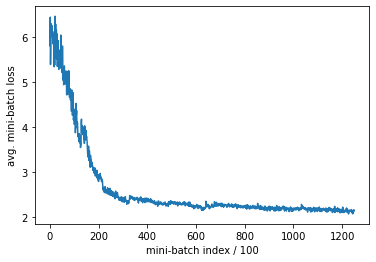

In [43]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate VGG16_2 on Test Dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


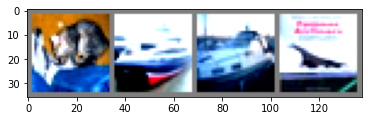

GroundTruth:    cat  ship  ship plane
Predicted:   deer   cat plane  ship


In [44]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = VGG16_2(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [45]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = VGG16_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 19 %


In [46]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = VGG16_2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 40 %
Accuracy of   car : 20 %
Accuracy of  bird : 10 %
Accuracy of   cat : 13 %
Accuracy of  deer : 10 %
Accuracy of   dog : 23 %
Accuracy of  frog : 26 %
Accuracy of horse : 21 %
Accuracy of  ship : 11 %
Accuracy of truck : 14 %


#### ResNet18 Network Definition

In [7]:
# Define the ResNet block
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = None
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = self.relu(out)
        return out

# Define the ResNet CNN
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self.make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self.make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self.make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

# Define the ResNet-18 CNN
def ResNet18():
    return ResNet(ResNetBlock, [2, 2, 2, 2])

# Instantiate the model
ResNet18 = ResNet18()
ResNet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResNetBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResNetBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

#### Optimizer and Loss Function for ResNet18

In [8]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(ResNet18.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)


#### Training Procedure for ResNet18

In [9]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

# Train the model
for epoch in rang#### Training Procedure for VGG16_2e(epochs):
    # Set model to training mode
    ResNet18.train()
    
    # Initialize variables for training
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        # Move inputs and targets to device
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Zero the parameter gradients
        opt.zero_grad()
        
        # Forward pass
        outputs = ResNet18(inputs)
        loss = loss_func(outputs, targets)
        
        # Backward pass
        loss.backward()
        opt.step()
        
        # Update statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
        # Print progress every 100 batches
        if batch_idx % 100 == 99:
            print('Epoch: %d, Batch: %d, Loss: %.3f, Accuracy: %.3f' %
                  (epoch + 1, batch_idx + 1, running_loss / 100, 100. * correct / total))
            avg_loss = running_loss / print_freq
            avg_losses.append(avg_loss)
            running_loss = 0.0
            correct = 0
            total = 0
            
print('Finished Training.')

Epoch: 1, Batch: 100, Loss: 2.407, Accuracy: 17.750
Epoch: 1, Batch: 200, Loss: 2.436, Accuracy: 16.750
Epoch: 1, Batch: 300, Loss: 2.316, Accuracy: 19.500
Epoch: 1, Batch: 400, Loss: 2.197, Accuracy: 23.500
Epoch: 1, Batch: 500, Loss: 2.281, Accuracy: 17.750
Epoch: 1, Batch: 600, Loss: 2.232, Accuracy: 21.750
Epoch: 1, Batch: 700, Loss: 2.111, Accuracy: 22.750
Epoch: 1, Batch: 800, Loss: 2.071, Accuracy: 24.750
Epoch: 1, Batch: 900, Loss: 2.140, Accuracy: 22.250
Epoch: 1, Batch: 1000, Loss: 2.014, Accuracy: 26.750
Epoch: 1, Batch: 1100, Loss: 2.004, Accuracy: 27.500
Epoch: 1, Batch: 1200, Loss: 1.993, Accuracy: 28.500
Epoch: 1, Batch: 1300, Loss: 2.035, Accuracy: 27.250
Epoch: 1, Batch: 1400, Loss: 1.981, Accuracy: 26.250
Epoch: 1, Batch: 1500, Loss: 2.028, Accuracy: 27.000
Epoch: 1, Batch: 1600, Loss: 1.927, Accuracy: 29.750
Epoch: 1, Batch: 1700, Loss: 1.945, Accuracy: 29.750
Epoch: 1, Batch: 1800, Loss: 1.834, Accuracy: 33.750
Epoch: 1, Batch: 1900, Loss: 1.994, Accuracy: 30.750
Ep

Epoch: 2, Batch: 3100, Loss: 1.095, Accuracy: 62.750
Epoch: 2, Batch: 3200, Loss: 1.060, Accuracy: 62.000
Epoch: 2, Batch: 3300, Loss: 0.988, Accuracy: 66.000
Epoch: 2, Batch: 3400, Loss: 0.989, Accuracy: 65.500
Epoch: 2, Batch: 3500, Loss: 0.897, Accuracy: 69.000
Epoch: 2, Batch: 3600, Loss: 1.046, Accuracy: 61.750
Epoch: 2, Batch: 3700, Loss: 1.014, Accuracy: 64.000
Epoch: 2, Batch: 3800, Loss: 1.023, Accuracy: 64.000
Epoch: 2, Batch: 3900, Loss: 1.186, Accuracy: 58.500
Epoch: 2, Batch: 4000, Loss: 1.159, Accuracy: 61.000
Epoch: 2, Batch: 4100, Loss: 1.029, Accuracy: 64.000
Epoch: 2, Batch: 4200, Loss: 0.982, Accuracy: 66.500
Epoch: 2, Batch: 4300, Loss: 0.991, Accuracy: 64.750
Epoch: 2, Batch: 4400, Loss: 0.957, Accuracy: 65.250
Epoch: 2, Batch: 4500, Loss: 1.064, Accuracy: 63.750
Epoch: 2, Batch: 4600, Loss: 1.018, Accuracy: 64.000
Epoch: 2, Batch: 4700, Loss: 1.070, Accuracy: 61.750
Epoch: 2, Batch: 4800, Loss: 0.973, Accuracy: 63.750
Epoch: 2, Batch: 4900, Loss: 0.931, Accuracy: 

Epoch: 3, Batch: 6100, Loss: 0.829, Accuracy: 70.750
Epoch: 3, Batch: 6200, Loss: 0.780, Accuracy: 71.750
Epoch: 3, Batch: 6300, Loss: 0.761, Accuracy: 73.750
Epoch: 3, Batch: 6400, Loss: 0.872, Accuracy: 70.250
Epoch: 3, Batch: 6500, Loss: 0.704, Accuracy: 73.750
Epoch: 3, Batch: 6600, Loss: 0.732, Accuracy: 74.250
Epoch: 3, Batch: 6700, Loss: 0.817, Accuracy: 72.250
Epoch: 3, Batch: 6800, Loss: 0.791, Accuracy: 74.000
Epoch: 3, Batch: 6900, Loss: 0.684, Accuracy: 77.250
Epoch: 3, Batch: 7000, Loss: 0.807, Accuracy: 72.500
Epoch: 3, Batch: 7100, Loss: 0.800, Accuracy: 74.250
Epoch: 3, Batch: 7200, Loss: 0.816, Accuracy: 71.750
Epoch: 3, Batch: 7300, Loss: 0.822, Accuracy: 71.500
Epoch: 3, Batch: 7400, Loss: 0.758, Accuracy: 73.250
Epoch: 3, Batch: 7500, Loss: 0.755, Accuracy: 72.500
Epoch: 3, Batch: 7600, Loss: 0.829, Accuracy: 72.500
Epoch: 3, Batch: 7700, Loss: 0.713, Accuracy: 74.500
Epoch: 3, Batch: 7800, Loss: 0.756, Accuracy: 72.750
Epoch: 3, Batch: 7900, Loss: 0.784, Accuracy: 

Epoch: 4, Batch: 9100, Loss: 0.624, Accuracy: 78.750
Epoch: 4, Batch: 9200, Loss: 0.761, Accuracy: 73.500
Epoch: 4, Batch: 9300, Loss: 0.703, Accuracy: 77.000
Epoch: 4, Batch: 9400, Loss: 0.623, Accuracy: 76.250
Epoch: 4, Batch: 9500, Loss: 0.608, Accuracy: 79.250
Epoch: 4, Batch: 9600, Loss: 0.753, Accuracy: 74.500
Epoch: 4, Batch: 9700, Loss: 0.622, Accuracy: 77.000
Epoch: 4, Batch: 9800, Loss: 0.654, Accuracy: 79.000
Epoch: 4, Batch: 9900, Loss: 0.725, Accuracy: 75.750
Epoch: 4, Batch: 10000, Loss: 0.651, Accuracy: 76.750
Epoch: 4, Batch: 10100, Loss: 0.679, Accuracy: 76.250
Epoch: 4, Batch: 10200, Loss: 0.585, Accuracy: 82.500
Epoch: 4, Batch: 10300, Loss: 0.587, Accuracy: 79.750
Epoch: 4, Batch: 10400, Loss: 0.629, Accuracy: 78.750
Epoch: 4, Batch: 10500, Loss: 0.667, Accuracy: 76.250
Epoch: 4, Batch: 10600, Loss: 0.672, Accuracy: 75.750
Epoch: 4, Batch: 10700, Loss: 0.618, Accuracy: 80.000
Epoch: 4, Batch: 10800, Loss: 0.643, Accuracy: 78.500
Epoch: 4, Batch: 10900, Loss: 0.640, 

Epoch: 5, Batch: 12000, Loss: 0.575, Accuracy: 81.750
Epoch: 5, Batch: 12100, Loss: 0.537, Accuracy: 80.250
Epoch: 5, Batch: 12200, Loss: 0.506, Accuracy: 84.750
Epoch: 5, Batch: 12300, Loss: 0.589, Accuracy: 80.250
Epoch: 5, Batch: 12400, Loss: 0.530, Accuracy: 81.250
Epoch: 5, Batch: 12500, Loss: 0.554, Accuracy: 79.750
Epoch: 6, Batch: 100, Loss: 0.609, Accuracy: 78.000
Epoch: 6, Batch: 200, Loss: 0.513, Accuracy: 82.500
Epoch: 6, Batch: 300, Loss: 0.483, Accuracy: 84.000
Epoch: 6, Batch: 400, Loss: 0.539, Accuracy: 81.500
Epoch: 6, Batch: 500, Loss: 0.492, Accuracy: 83.250
Epoch: 6, Batch: 600, Loss: 0.515, Accuracy: 82.500
Epoch: 6, Batch: 700, Loss: 0.556, Accuracy: 81.000
Epoch: 6, Batch: 800, Loss: 0.533, Accuracy: 82.250
Epoch: 6, Batch: 900, Loss: 0.597, Accuracy: 79.000
Epoch: 6, Batch: 1000, Loss: 0.518, Accuracy: 82.500
Epoch: 6, Batch: 1100, Loss: 0.594, Accuracy: 80.750
Epoch: 6, Batch: 1200, Loss: 0.633, Accuracy: 78.250
Epoch: 6, Batch: 1300, Loss: 0.573, Accuracy: 80.

Epoch: 7, Batch: 2500, Loss: 0.534, Accuracy: 81.000
Epoch: 7, Batch: 2600, Loss: 0.514, Accuracy: 82.250
Epoch: 7, Batch: 2700, Loss: 0.519, Accuracy: 82.250
Epoch: 7, Batch: 2800, Loss: 0.465, Accuracy: 85.500
Epoch: 7, Batch: 2900, Loss: 0.517, Accuracy: 82.250
Epoch: 7, Batch: 3000, Loss: 0.547, Accuracy: 81.750
Epoch: 7, Batch: 3100, Loss: 0.633, Accuracy: 78.750
Epoch: 7, Batch: 3200, Loss: 0.559, Accuracy: 80.500
Epoch: 7, Batch: 3300, Loss: 0.493, Accuracy: 84.250
Epoch: 7, Batch: 3400, Loss: 0.449, Accuracy: 83.500
Epoch: 7, Batch: 3500, Loss: 0.471, Accuracy: 83.250
Epoch: 7, Batch: 3600, Loss: 0.494, Accuracy: 83.250
Epoch: 7, Batch: 3700, Loss: 0.487, Accuracy: 85.750
Epoch: 7, Batch: 3800, Loss: 0.516, Accuracy: 81.750
Epoch: 7, Batch: 3900, Loss: 0.469, Accuracy: 83.750
Epoch: 7, Batch: 4000, Loss: 0.504, Accuracy: 80.250
Epoch: 7, Batch: 4100, Loss: 0.485, Accuracy: 84.500
Epoch: 7, Batch: 4200, Loss: 0.408, Accuracy: 86.000
Epoch: 7, Batch: 4300, Loss: 0.406, Accuracy: 

Epoch: 8, Batch: 5500, Loss: 0.461, Accuracy: 84.000
Epoch: 8, Batch: 5600, Loss: 0.437, Accuracy: 85.500
Epoch: 8, Batch: 5700, Loss: 0.426, Accuracy: 85.000
Epoch: 8, Batch: 5800, Loss: 0.398, Accuracy: 84.750
Epoch: 8, Batch: 5900, Loss: 0.442, Accuracy: 87.000
Epoch: 8, Batch: 6000, Loss: 0.501, Accuracy: 80.500
Epoch: 8, Batch: 6100, Loss: 0.413, Accuracy: 87.250
Epoch: 8, Batch: 6200, Loss: 0.426, Accuracy: 86.500
Epoch: 8, Batch: 6300, Loss: 0.466, Accuracy: 83.250
Epoch: 8, Batch: 6400, Loss: 0.376, Accuracy: 87.750
Epoch: 8, Batch: 6500, Loss: 0.461, Accuracy: 84.250
Epoch: 8, Batch: 6600, Loss: 0.531, Accuracy: 80.750
Epoch: 8, Batch: 6700, Loss: 0.435, Accuracy: 84.750
Epoch: 8, Batch: 6800, Loss: 0.400, Accuracy: 85.250
Epoch: 8, Batch: 6900, Loss: 0.494, Accuracy: 82.500
Epoch: 8, Batch: 7000, Loss: 0.524, Accuracy: 83.750
Epoch: 8, Batch: 7100, Loss: 0.488, Accuracy: 81.000
Epoch: 8, Batch: 7200, Loss: 0.372, Accuracy: 87.500
Epoch: 8, Batch: 7300, Loss: 0.472, Accuracy: 

Epoch: 9, Batch: 8500, Loss: 0.445, Accuracy: 86.500
Epoch: 9, Batch: 8600, Loss: 0.360, Accuracy: 87.500
Epoch: 9, Batch: 8700, Loss: 0.416, Accuracy: 87.000
Epoch: 9, Batch: 8800, Loss: 0.341, Accuracy: 88.000
Epoch: 9, Batch: 8900, Loss: 0.367, Accuracy: 88.000
Epoch: 9, Batch: 9000, Loss: 0.442, Accuracy: 84.750
Epoch: 9, Batch: 9100, Loss: 0.327, Accuracy: 89.000
Epoch: 9, Batch: 9200, Loss: 0.357, Accuracy: 87.500
Epoch: 9, Batch: 9300, Loss: 0.421, Accuracy: 86.000
Epoch: 9, Batch: 9400, Loss: 0.462, Accuracy: 84.250
Epoch: 9, Batch: 9500, Loss: 0.346, Accuracy: 87.250
Epoch: 9, Batch: 9600, Loss: 0.429, Accuracy: 86.000
Epoch: 9, Batch: 9700, Loss: 0.380, Accuracy: 86.250
Epoch: 9, Batch: 9800, Loss: 0.406, Accuracy: 86.750
Epoch: 9, Batch: 9900, Loss: 0.452, Accuracy: 82.500
Epoch: 9, Batch: 10000, Loss: 0.373, Accuracy: 87.000
Epoch: 9, Batch: 10100, Loss: 0.380, Accuracy: 86.250
Epoch: 9, Batch: 10200, Loss: 0.462, Accuracy: 84.500
Epoch: 9, Batch: 10300, Loss: 0.504, Accura

Epoch: 10, Batch: 11200, Loss: 0.289, Accuracy: 88.750
Epoch: 10, Batch: 11300, Loss: 0.402, Accuracy: 85.750
Epoch: 10, Batch: 11400, Loss: 0.380, Accuracy: 87.250
Epoch: 10, Batch: 11500, Loss: 0.304, Accuracy: 89.250
Epoch: 10, Batch: 11600, Loss: 0.403, Accuracy: 85.750
Epoch: 10, Batch: 11700, Loss: 0.387, Accuracy: 87.750
Epoch: 10, Batch: 11800, Loss: 0.389, Accuracy: 88.250
Epoch: 10, Batch: 11900, Loss: 0.358, Accuracy: 88.250
Epoch: 10, Batch: 12000, Loss: 0.392, Accuracy: 85.750
Epoch: 10, Batch: 12100, Loss: 0.363, Accuracy: 88.000
Epoch: 10, Batch: 12200, Loss: 0.358, Accuracy: 87.000
Epoch: 10, Batch: 12300, Loss: 0.352, Accuracy: 88.750
Epoch: 10, Batch: 12400, Loss: 0.444, Accuracy: 85.500
Epoch: 10, Batch: 12500, Loss: 0.346, Accuracy: 87.750
Finished Training.


#### Training Loss Curve for ResNet18

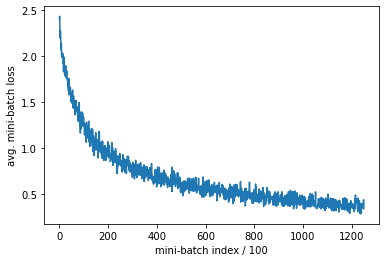

In [10]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate ResNet18 on Test Dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


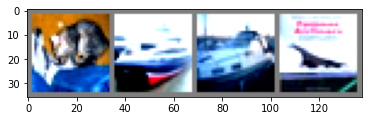

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


In [11]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = ResNet18(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [12]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = ResNet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 84 %


In [13]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = ResNet18(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 84 %
Accuracy of   car : 91 %
Accuracy of  bird : 74 %
Accuracy of   cat : 76 %
Accuracy of  deer : 82 %
Accuracy of   dog : 74 %
Accuracy of  frog : 82 %
Accuracy of horse : 91 %
Accuracy of  ship : 92 %
Accuracy of truck : 95 %


#### ResNet18 Network Definition with 2 more Layers

In [20]:
# Define the ResNet block
class ResNetBlock_2(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResNetBlock_2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = None
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = self.relu(out)
        return out

# Define the ResNet CNN
class ResNet_2(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet_2, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self.make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self.make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self.make_layer(block, 512, num_blocks[3], stride=2)
        # Additional Layers
        self.layer5 = self.make_layer(block, 512, 2, stride=1)
        self.layer6 = self.make_layer(block, 512, 2, stride=1)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

# Define the ResNet-18 CNN
def ResNet18_2():
    return ResNet_2(ResNetBlock_2, [2, 2, 2, 2])

# Instantiate the model
ResNet18_2 = ResNet18_2()
ResNet18_2.to(device)

ResNet_2(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResNetBlock_2(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResNetBlock_2(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), b

#### Optimizer and Loss Function for ResNet18_2

In [23]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(ResNet18_2.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
# learning rate schedular
lr_scheduler = optim.lr_scheduler.StepLR(opt, step_size=5, gamma=0.1)

#### Training Procedure for ResNet18_2

In [25]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

# Train the model
for epoch in range(epochs):
    # Set model to training mode
    ResNet18_2.train()
    
    # Initialize variables for training
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        # Move inputs and targets to device
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Zero the parameter gradients
        opt.zero_grad()
        
        # Forward pass
        outputs = ResNet18_2(inputs)
        loss = loss_func(outputs, targets)
        
        # Backward pass
        loss.backward()
        opt.step()
        
        # Update statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
        # Print progress every 100 batches
        if batch_idx % 100 == 99:
            print('Epoch: %d, Batch: %d, Loss: %.3f, Accuracy: %.3f' %
                  (epoch + 1, batch_idx + 1, running_loss / 100, 100. * correct / total))
            avg_loss = running_loss / print_freq
            avg_losses.append(avg_loss)
            running_loss = 0.0
            correct = 0
            total = 0
    
    lr_scheduler.step()
                
print('Finished Training.')

Epoch: 1, Batch: 100, Loss: 3.403, Accuracy: 13.000
Epoch: 1, Batch: 200, Loss: 3.066, Accuracy: 15.750
Epoch: 1, Batch: 300, Loss: 2.579, Accuracy: 20.750
Epoch: 1, Batch: 400, Loss: 2.437, Accuracy: 17.250
Epoch: 1, Batch: 500, Loss: 2.482, Accuracy: 20.000
Epoch: 1, Batch: 600, Loss: 2.371, Accuracy: 18.000
Epoch: 1, Batch: 700, Loss: 2.365, Accuracy: 20.750
Epoch: 1, Batch: 800, Loss: 2.320, Accuracy: 19.000
Epoch: 1, Batch: 900, Loss: 2.239, Accuracy: 22.000
Epoch: 1, Batch: 1000, Loss: 2.254, Accuracy: 20.500
Epoch: 1, Batch: 1100, Loss: 2.257, Accuracy: 22.750
Epoch: 1, Batch: 1200, Loss: 2.074, Accuracy: 24.250
Epoch: 1, Batch: 1300, Loss: 2.148, Accuracy: 25.750
Epoch: 1, Batch: 1400, Loss: 2.204, Accuracy: 20.500
Epoch: 1, Batch: 1500, Loss: 2.161, Accuracy: 23.500
Epoch: 1, Batch: 1600, Loss: 2.117, Accuracy: 23.750
Epoch: 1, Batch: 1700, Loss: 2.059, Accuracy: 29.500
Epoch: 1, Batch: 1800, Loss: 2.027, Accuracy: 26.250
Epoch: 1, Batch: 1900, Loss: 2.100, Accuracy: 26.500
Ep

Epoch: 2, Batch: 3100, Loss: 1.023, Accuracy: 61.500
Epoch: 2, Batch: 3200, Loss: 1.083, Accuracy: 61.500
Epoch: 2, Batch: 3300, Loss: 1.238, Accuracy: 57.000
Epoch: 2, Batch: 3400, Loss: 1.188, Accuracy: 58.500
Epoch: 2, Batch: 3500, Loss: 1.188, Accuracy: 57.250
Epoch: 2, Batch: 3600, Loss: 1.117, Accuracy: 59.000
Epoch: 2, Batch: 3700, Loss: 1.038, Accuracy: 62.000
Epoch: 2, Batch: 3800, Loss: 1.163, Accuracy: 55.750
Epoch: 2, Batch: 3900, Loss: 1.133, Accuracy: 62.250
Epoch: 2, Batch: 4000, Loss: 1.079, Accuracy: 60.000
Epoch: 2, Batch: 4100, Loss: 1.010, Accuracy: 62.000
Epoch: 2, Batch: 4200, Loss: 1.069, Accuracy: 61.500
Epoch: 2, Batch: 4300, Loss: 1.098, Accuracy: 62.500
Epoch: 2, Batch: 4400, Loss: 1.218, Accuracy: 55.750
Epoch: 2, Batch: 4500, Loss: 1.117, Accuracy: 61.750
Epoch: 2, Batch: 4600, Loss: 0.995, Accuracy: 64.750
Epoch: 2, Batch: 4700, Loss: 1.094, Accuracy: 64.000
Epoch: 2, Batch: 4800, Loss: 1.124, Accuracy: 59.500
Epoch: 2, Batch: 4900, Loss: 1.037, Accuracy: 

Epoch: 3, Batch: 6100, Loss: 0.791, Accuracy: 70.250
Epoch: 3, Batch: 6200, Loss: 0.748, Accuracy: 76.000
Epoch: 3, Batch: 6300, Loss: 0.780, Accuracy: 72.750
Epoch: 3, Batch: 6400, Loss: 0.890, Accuracy: 71.250
Epoch: 3, Batch: 6500, Loss: 0.842, Accuracy: 70.000
Epoch: 3, Batch: 6600, Loss: 0.848, Accuracy: 70.500
Epoch: 3, Batch: 6700, Loss: 0.779, Accuracy: 69.500
Epoch: 3, Batch: 6800, Loss: 0.784, Accuracy: 70.750
Epoch: 3, Batch: 6900, Loss: 0.891, Accuracy: 70.000
Epoch: 3, Batch: 7000, Loss: 0.746, Accuracy: 75.000
Epoch: 3, Batch: 7100, Loss: 0.837, Accuracy: 71.750
Epoch: 3, Batch: 7200, Loss: 0.863, Accuracy: 68.750
Epoch: 3, Batch: 7300, Loss: 0.817, Accuracy: 71.750
Epoch: 3, Batch: 7400, Loss: 0.873, Accuracy: 67.750
Epoch: 3, Batch: 7500, Loss: 0.793, Accuracy: 73.250
Epoch: 3, Batch: 7600, Loss: 0.864, Accuracy: 70.500
Epoch: 3, Batch: 7700, Loss: 0.736, Accuracy: 73.250
Epoch: 3, Batch: 7800, Loss: 0.800, Accuracy: 73.500
Epoch: 3, Batch: 7900, Loss: 0.782, Accuracy: 

Epoch: 4, Batch: 9100, Loss: 0.649, Accuracy: 74.500
Epoch: 4, Batch: 9200, Loss: 0.697, Accuracy: 76.500
Epoch: 4, Batch: 9300, Loss: 0.648, Accuracy: 76.250
Epoch: 4, Batch: 9400, Loss: 0.650, Accuracy: 78.750
Epoch: 4, Batch: 9500, Loss: 0.582, Accuracy: 80.250
Epoch: 4, Batch: 9600, Loss: 0.547, Accuracy: 80.750
Epoch: 4, Batch: 9700, Loss: 0.704, Accuracy: 74.750
Epoch: 4, Batch: 9800, Loss: 0.741, Accuracy: 72.250
Epoch: 4, Batch: 9900, Loss: 0.678, Accuracy: 77.250
Epoch: 4, Batch: 10000, Loss: 0.693, Accuracy: 74.250
Epoch: 4, Batch: 10100, Loss: 0.760, Accuracy: 73.500
Epoch: 4, Batch: 10200, Loss: 0.759, Accuracy: 71.500
Epoch: 4, Batch: 10300, Loss: 0.678, Accuracy: 76.250
Epoch: 4, Batch: 10400, Loss: 0.612, Accuracy: 78.250
Epoch: 4, Batch: 10500, Loss: 0.656, Accuracy: 77.000
Epoch: 4, Batch: 10600, Loss: 0.629, Accuracy: 79.000
Epoch: 4, Batch: 10700, Loss: 0.587, Accuracy: 80.250
Epoch: 4, Batch: 10800, Loss: 0.672, Accuracy: 77.000
Epoch: 4, Batch: 10900, Loss: 0.765, 

Epoch: 5, Batch: 12000, Loss: 0.582, Accuracy: 79.250
Epoch: 5, Batch: 12100, Loss: 0.578, Accuracy: 81.250
Epoch: 5, Batch: 12200, Loss: 0.545, Accuracy: 81.500
Epoch: 5, Batch: 12300, Loss: 0.544, Accuracy: 82.000
Epoch: 5, Batch: 12400, Loss: 0.614, Accuracy: 78.000
Epoch: 5, Batch: 12500, Loss: 0.601, Accuracy: 79.000
Epoch: 6, Batch: 100, Loss: 0.474, Accuracy: 82.750
Epoch: 6, Batch: 200, Loss: 0.460, Accuracy: 83.750
Epoch: 6, Batch: 300, Loss: 0.513, Accuracy: 81.250
Epoch: 6, Batch: 400, Loss: 0.417, Accuracy: 84.000
Epoch: 6, Batch: 500, Loss: 0.445, Accuracy: 84.500
Epoch: 6, Batch: 600, Loss: 0.513, Accuracy: 80.750
Epoch: 6, Batch: 700, Loss: 0.528, Accuracy: 83.750
Epoch: 6, Batch: 800, Loss: 0.446, Accuracy: 84.750
Epoch: 6, Batch: 900, Loss: 0.514, Accuracy: 82.250
Epoch: 6, Batch: 1000, Loss: 0.516, Accuracy: 81.250
Epoch: 6, Batch: 1100, Loss: 0.458, Accuracy: 83.000
Epoch: 6, Batch: 1200, Loss: 0.475, Accuracy: 84.250
Epoch: 6, Batch: 1300, Loss: 0.401, Accuracy: 87.

Epoch: 7, Batch: 2500, Loss: 0.403, Accuracy: 86.000
Epoch: 7, Batch: 2600, Loss: 0.355, Accuracy: 86.500
Epoch: 7, Batch: 2700, Loss: 0.466, Accuracy: 82.750
Epoch: 7, Batch: 2800, Loss: 0.356, Accuracy: 87.500
Epoch: 7, Batch: 2900, Loss: 0.431, Accuracy: 84.500
Epoch: 7, Batch: 3000, Loss: 0.418, Accuracy: 86.500
Epoch: 7, Batch: 3100, Loss: 0.440, Accuracy: 85.000
Epoch: 7, Batch: 3200, Loss: 0.359, Accuracy: 89.000
Epoch: 7, Batch: 3300, Loss: 0.421, Accuracy: 85.750
Epoch: 7, Batch: 3400, Loss: 0.366, Accuracy: 87.500
Epoch: 7, Batch: 3500, Loss: 0.432, Accuracy: 85.000
Epoch: 7, Batch: 3600, Loss: 0.457, Accuracy: 83.250
Epoch: 7, Batch: 3700, Loss: 0.456, Accuracy: 85.750
Epoch: 7, Batch: 3800, Loss: 0.400, Accuracy: 84.750
Epoch: 7, Batch: 3900, Loss: 0.339, Accuracy: 88.000
Epoch: 7, Batch: 4000, Loss: 0.349, Accuracy: 89.750
Epoch: 7, Batch: 4100, Loss: 0.478, Accuracy: 82.000
Epoch: 7, Batch: 4200, Loss: 0.431, Accuracy: 85.500
Epoch: 7, Batch: 4300, Loss: 0.432, Accuracy: 

Epoch: 8, Batch: 5500, Loss: 0.443, Accuracy: 82.750
Epoch: 8, Batch: 5600, Loss: 0.353, Accuracy: 88.250
Epoch: 8, Batch: 5700, Loss: 0.402, Accuracy: 87.000
Epoch: 8, Batch: 5800, Loss: 0.374, Accuracy: 86.250
Epoch: 8, Batch: 5900, Loss: 0.329, Accuracy: 89.500
Epoch: 8, Batch: 6000, Loss: 0.414, Accuracy: 86.000
Epoch: 8, Batch: 6100, Loss: 0.397, Accuracy: 85.500
Epoch: 8, Batch: 6200, Loss: 0.418, Accuracy: 85.500
Epoch: 8, Batch: 6300, Loss: 0.419, Accuracy: 85.250
Epoch: 8, Batch: 6400, Loss: 0.407, Accuracy: 87.250
Epoch: 8, Batch: 6500, Loss: 0.398, Accuracy: 86.500
Epoch: 8, Batch: 6600, Loss: 0.393, Accuracy: 86.250
Epoch: 8, Batch: 6700, Loss: 0.392, Accuracy: 87.500
Epoch: 8, Batch: 6800, Loss: 0.326, Accuracy: 89.250
Epoch: 8, Batch: 6900, Loss: 0.356, Accuracy: 88.250
Epoch: 8, Batch: 7000, Loss: 0.326, Accuracy: 89.500
Epoch: 8, Batch: 7100, Loss: 0.344, Accuracy: 88.250
Epoch: 8, Batch: 7200, Loss: 0.417, Accuracy: 86.000
Epoch: 8, Batch: 7300, Loss: 0.363, Accuracy: 

Epoch: 9, Batch: 8500, Loss: 0.355, Accuracy: 89.750
Epoch: 9, Batch: 8600, Loss: 0.359, Accuracy: 88.750
Epoch: 9, Batch: 8700, Loss: 0.412, Accuracy: 86.750
Epoch: 9, Batch: 8800, Loss: 0.338, Accuracy: 87.750
Epoch: 9, Batch: 8900, Loss: 0.339, Accuracy: 88.250
Epoch: 9, Batch: 9000, Loss: 0.405, Accuracy: 87.000
Epoch: 9, Batch: 9100, Loss: 0.364, Accuracy: 87.000
Epoch: 9, Batch: 9200, Loss: 0.432, Accuracy: 84.750
Epoch: 9, Batch: 9300, Loss: 0.329, Accuracy: 88.250
Epoch: 9, Batch: 9400, Loss: 0.368, Accuracy: 89.000
Epoch: 9, Batch: 9500, Loss: 0.343, Accuracy: 89.000
Epoch: 9, Batch: 9600, Loss: 0.286, Accuracy: 89.500
Epoch: 9, Batch: 9700, Loss: 0.373, Accuracy: 88.000
Epoch: 9, Batch: 9800, Loss: 0.362, Accuracy: 87.250
Epoch: 9, Batch: 9900, Loss: 0.353, Accuracy: 87.500
Epoch: 9, Batch: 10000, Loss: 0.357, Accuracy: 88.000
Epoch: 9, Batch: 10100, Loss: 0.387, Accuracy: 85.500
Epoch: 9, Batch: 10200, Loss: 0.387, Accuracy: 85.000
Epoch: 9, Batch: 10300, Loss: 0.326, Accura

Epoch: 10, Batch: 11200, Loss: 0.317, Accuracy: 89.750
Epoch: 10, Batch: 11300, Loss: 0.282, Accuracy: 90.500
Epoch: 10, Batch: 11400, Loss: 0.286, Accuracy: 89.750
Epoch: 10, Batch: 11500, Loss: 0.400, Accuracy: 84.250
Epoch: 10, Batch: 11600, Loss: 0.349, Accuracy: 87.000
Epoch: 10, Batch: 11700, Loss: 0.336, Accuracy: 90.250
Epoch: 10, Batch: 11800, Loss: 0.342, Accuracy: 87.000
Epoch: 10, Batch: 11900, Loss: 0.307, Accuracy: 90.250
Epoch: 10, Batch: 12000, Loss: 0.356, Accuracy: 87.000
Epoch: 10, Batch: 12100, Loss: 0.410, Accuracy: 87.000
Epoch: 10, Batch: 12200, Loss: 0.307, Accuracy: 88.500
Epoch: 10, Batch: 12300, Loss: 0.300, Accuracy: 87.750
Epoch: 10, Batch: 12400, Loss: 0.321, Accuracy: 88.000
Epoch: 10, Batch: 12500, Loss: 0.334, Accuracy: 88.500
Finished Training.


#### Training Loss Curve for ResNet18_2

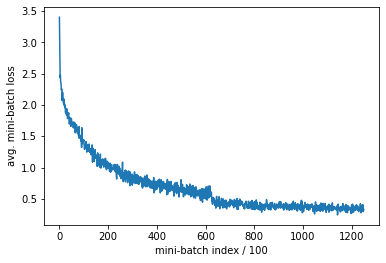

In [26]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate ResNet18_2 on Test Dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


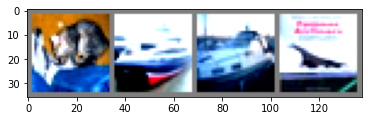

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


In [27]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = ResNet18_2(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [28]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = ResNet18_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 85 %


In [29]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = ResNet18(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 84 %
Accuracy of   car : 91 %
Accuracy of  bird : 74 %
Accuracy of   cat : 76 %
Accuracy of  deer : 82 %
Accuracy of   dog : 74 %
Accuracy of  frog : 82 %
Accuracy of horse : 91 %
Accuracy of  ship : 92 %
Accuracy of truck : 95 %
